In [1]:
###take two
################################
######### xxxxxxx ##############
################################


#Ratign FIt regression
#COUNTRYES, 20 COUNTRIES
#Y DEPENDETENT, VARABLE ADAT LATESTS, AVERAGE 1 WEEK, AVERAGE 1 MONTH, AVEREAGE 3 MONTHS, 
#TIMESX4
#mODEL ADJUSTES MODEL 1, MODEL 2, MODEL1 FILTERED, MODEL 2 FILTERED
#Polinomical binomial X2 + X + C
####poliynocmic no constant
#Logaritmic exponetial LN() +C 
###Logaritmic no constant
# CUBIC?
#TIMESX4
#X INDEPEDNTEDN, ONLY RATING, RATING +OUTLOOK, RATING AND OUTLOOK EFFECTIVE. 
#TIMESX3

#------------------------------------------------------------
#m0110
#model 1 poli | all counntries nf | cds latest | rating x2x3x4
#m0120****adding half expectations
#model 1 poli | all counntries|  cds latest |  rating + outlook/0.5 x2x3x4
#m0130****adding full expectations
#model 1 poli | all counntries|  cds latest | rating + outlook*1 x2x3x4 
#filtered
#m0140
#model 1 poli | filtered countries | cds latest | rating x2x3x4 
#m0150
#model 1 poli | filtered countries | cds |latest | rating + outlook/0.5 x2x3x4
#m0160
#model 1 poli | filtered countries | cds latest | rating + outlook*1 x2x3x4
#-----------------------------------------------------
#m0210
#model 1 loga | all counntries nf | cds latest | rating
#m0220
#model 1 loga | all counntries | cds latest | rating + outlook/0.5
#m0230
#model 1 loga | all counntries | cds latest | rating + outlook*1
#filtered
#m0240
#model 1 loga | filtered countries | cds latest | rating
#m0250
#model 1 loga |  filtered countries | cds latest |  rating + outlook/0.5
#m0260
#model 1 loga | filtered countries | cds latest | rating + outlook*1
#--------------------------------------------------------------------
####loop for 5days, 30days, 90 days,



#Negative: The implied fit model indicates that the CDS spread should be higher than the current market spread. 
#Therefore the CDS spread is lower than the one implied by the aggregated ratings (market is pricing a lower risk than the rating agencies)

#Positive: The implied fit model indicates that the CDS spread should be lower than the current market spread. 
#Therefore the CDS spread is higher than the one implied by the aggregated ratings (market is pricing a higher risk than the rating agencies) 




#make databae
#df country, tickers, ratings, oulooks, cds in differnt prereidos, and then the time of today

#cahnge all ratings to a number qunatiative value
# chnage all outlooks to a number
#consoldiadte again database

In [2]:
## import packages, 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn import datasets
#from sklearn.tree import DecisionTreeClassifier 
import numpy
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
from datetime import datetime

import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# ignore any "invalid value in log" warnings internal to curve_fit() routine
import warnings
warnings.filterwarnings("ignore")
#https://stackoverflow.com/questions/59805561/python-using-curve-fit-to-fit-a-logarithmic-function



import pandas as pd 
import os

import PIL
from PIL import Image
#import os
from PyPDF2 import PdfFileMerger
from PyPDF2 import PdfFileMerger
import numpy as np 
from pandas.plotting import table

from codetiming import Timer
timeclock = Timer(name="class")
timeclock.start()


#from matplotlib import pyplot as plt
#from matplotlib import pyplot as plt

#from timer import Timer
#time_clock = Timer()
#time_clock.start()

In [3]:
#rating_translation
##load dataset
rating_table = pd.read_csv (r'K:\2020_2431\q\sandbox\rating_translation.csv')
print(rating_table)
rating_table['number'] = rating_table['number'].round(0)
#create table for each ratign agency
moodys_table = rating_table[rating_table.agency == 'moodys']
del moodys_table['agency']
moodys_table=moodys_table.reset_index(drop=True)
print(moodys_table)
fitch_table = rating_table[rating_table.agency == 'fitch']
del fitch_table['agency']
fitch_table=fitch_table.reset_index(drop=True)
print(fitch_table)
sp_table = rating_table[rating_table.agency == 'sp']
del sp_table['agency']
sp_table=sp_table.reset_index(drop=True)
print(sp_table)

    agency rating  number
0   moodys    Aaa    20.0
1   moodys    Aa1    19.0
2   moodys    Aa2    18.0
3   moodys    Aa3    17.0
4   moodys     A1    16.0
..     ...    ...     ...
77   fitch    DDD     3.0
78   fitch     DD     2.0
79   fitch      D     1.0
80   fitch     NR     0.0
81   fitch     WD     0.0

[82 rows x 3 columns]
   rating  number
0     Aaa    20.0
1     Aa1    19.0
2     Aa2    18.0
3     Aa3    17.0
4      A1    16.0
5      A2    15.0
6      A3    14.0
7    Baa1    13.0
8    Baa2    12.0
9    Baa3    11.0
10    Ba1    10.0
11    Ba2     9.0
12    Ba3     8.0
13     B1     7.0
14     B2     6.0
15     B3     5.0
16   Caa1     4.0
17   Caa2     4.0
18   Caa3     4.0
19     Ca     3.0
20      C     2.0
21   Aa2u    19.0
22   Aaau    20.0
23  Baa3u    11.0
24  B2 *-     6.0
25    B2u     6.0
26   Aa3u    17.0
   rating  number
0     AAA    20.0
1     AA+    19.0
2      AA    18.0
3     AA-    17.0
4      A+    16.0
5       A    15.0
6      A-    14.0
7    BBB+    13.0

In [4]:
#load database
#df_rating.to_csv (r'K:\2020_2431\q\sandbox_hc\data_rating.csv', index = False, header=True)
###database generated
base001 = pd.read_csv (r'K:\2020_2431\q\sandbox_hc\data_rating_fit.csv')
#contry, ticker, rating, moody, sp , fitch 
print(base001)
base=base001
base=base.reset_index(drop=True)
base_country=base.country

        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  \
0          STABLE

In [5]:
##Emerging markets dummy, dummy identify EM 

base.loc[(base['country'] == 'South Korea') | 
         (base['country'] == 'Korea')|
         (base['country'] == 'Indonesia')| 
         (base['country'] == 'Thailand')| 
         (base['country'] == 'Malaysia')| 
         (base['country'] == 'China')| 
         (base['country'] == 'Philippines')| 
         (base['country'] == 'Brazil') | 
         (base['country'] == 'Mexico') | 
         (base['country'] == 'Colombia') | 
         (base['country'] == 'Chile') | 
         (base['country'] == 'Peru') |                 
         (base['country'] == 'Russia') | 
         (base['country'] == 'Turkey') | 
         (base['country'] == 'Israel') | 
         (base['country'] == 'South Africa') | 
         (base['country'] == 'Hungary')| 
         (base['country'] == 'Czech Republic')| 
         (base['country'] == 'Poland'), 'em_dummy'] = 1  

base.loc[(base['country'] != 'South Korea') & 
         (base['country'] != 'Korea') &
         (base['country'] != 'Indonesia') &
         (base['country'] != 'Thailand') &
         (base['country'] != 'Malaysia') &
         (base['country'] != 'China') &
         (base['country'] != 'Philippines') & 
         (base['country'] != 'Brazil') &
         (base['country'] != 'Mexico') & 
         (base['country'] != 'Colombia') & 
         (base['country'] != 'Chile') &
         (base['country'] != 'Peru') &                
         (base['country'] != 'Russia') & 
         (base['country'] != 'Turkey') & 
         (base['country'] != 'Israel') & 
         (base['country'] != 'South Africa') & 
         (base['country'] != 'Hungary') &
         (base['country'] != 'Czech Republic') &
         (base['country'] != 'Poland'), 'em_dummy'] = 0 




print(base)         
  

        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  \
0          STABLE

In [6]:
#dUMMY REGION       
    
base.loc[(base['country'] == 'Brazil') | 
         (base['country'] == 'Mexico') | 
         (base['country'] == 'Colombia') | 
         (base['country'] == 'Chile') | 
         (base['country'] == 'Peru'), 'region001'] = 1  

base.loc[(base['country'] != 'Brazil') & 
         (base['country'] != 'Mexico') & 
         (base['country'] != 'Colombia') & 
         (base['country'] != 'Chile') & 
         (base['country'] != 'Peru'), 'region001'] = 0  

#region   
base.loc[(base['country'] == 'Russia') 
         | (base['country'] == 'Turkey')
         | (base['country'] == 'South Africa')
         | (base['country'] == 'Hungary')
         | (base['country'] == 'Poland'), 'region002'] = 1  

base.loc[(base['country'] != 'Russia') 
         & (base['country'] != 'Turkey')
         & (base['country'] != 'South Africa')
         & (base['country'] != 'Hungary')
         & (base['country'] != 'Poland'), 'region002'] = 0  

#region 

base.loc[(base['country'] == 'Korea') 
         | (base['country'] == 'Indonesia')
         | (base['country'] == 'Thailand')
         | (base['country'] == 'Malaysia')
         | (base['country'] == 'China')
         | (base['country'] == 'Philippines'), 'region003'] = 1  

base.loc[(base['country'] != 'Korea') & 
         (base['country'] != 'Indonesia') & 
         (base['country'] != 'Thailand') & 
         (base['country'] != 'Malaysia') & 
         (base['country'] != 'China') & 
         (base['country'] != 'Philippines'), 'region003'] = 0  



In [7]:
#MERGE RATING NUMBER
#rating_table['number']

#moodys_table
#base['moodys_rating_n'] = base['rating'].apply(lambda 'number': moodys_table['rating'])


base = pd.merge(base, moodys_table, how='left', left_on='rating_moodys', right_on='rating')
base=base.rename(columns = {'number':'moodys_rating_n'})
del base['rating']
base = pd.merge(base, fitch_table, how='left', left_on='rating_fitch', right_on='rating')
base=base.rename(columns = {'number':'fitch_rating_n'})
del base['rating']
base = pd.merge(base, sp_table, how='left', left_on='rating_sp', right_on='rating')
base=base.rename(columns = {'number':'sp_rating_n'})
del base['rating']


print(base)


        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  \
0          STABLE

In [8]:
#define logi of outlook
#STABLE     STABLE # NEG#POS#print(base)

def outlook_conditions(s):
    if (s['outlook_fitch'] =='NEG' ):
        return -1
    if (s['outlook_fitch'] =='STABLE' ):
        return 0
    if (s['outlook_fitch'] =='POS' ):
        return 1  
    else:
        return 0
    
base['outlook_fitch_n'] = base.apply(outlook_conditions, axis=1)

def outlook_conditions(s):
    if (s['outlook_moodys'] =='NEG' ):
        return -1
    if (s['outlook_moodys'] =='STABLE' ):
        return 0
    if (s['outlook_moodys'] =='POS' ):
        return 1  
    else:
        return 0
    
base['outlook_moodys_n'] = base.apply(outlook_conditions, axis=1)


def outlook_conditions(s):
    if (s['outlook_sp'] =='NEG' ):
        return -1
    if (s['outlook_sp'] =='STABLE' ):
        return 0
    if (s['outlook_sp'] =='POS' ):
        return 1  
    else:
        return 0
    
base['outlook_sp_n'] = base.apply(outlook_conditions, axis=1)

In [9]:
#determine if investmetne grade

#moodys baa3 investemtn grade,  ba1 non investmetne grade
#11 ins ivnestmetn grade, 10 non ivnestmetne grade
#sp bbb- investmetne grade ,bb+ non investmente grade
#11 ins ivnestmetn grade, 10 non ivnestmetne grade
#fitch bbb- investmetne grade, bb+ nmon investmetne grade
#11 ins ivnestmetn grade, 10 non ivnestmetne grade


#investment grade dummy

def ig_conditions(s):
    if (s['moodys_rating_n'] >= 11 ):
        return 1
    else:
        return 0

base['moodys_ig_d'] = base.apply(ig_conditions, axis=1)


def ig_conditions(s):
    if (s['fitch_rating_n'] >= 11 ):
        return 1
    else:
        return 0

base['fitch_ig_d'] = base.apply(ig_conditions, axis=1)


def ig_conditions(s):
    if (s['sp_rating_n'] >= 11 ):
        return 1
    else:
        return 0

base['sp_ig_d'] = base.apply(ig_conditions, axis=1)

print(base)

        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  ...  \
0          S

# create all x independent variables combinations

In [10]:
# create all x independent variables combinations
base["average_rating_n"] = ((base["moodys_rating_n"]+base["fitch_rating_n"]+base["sp_rating_n"])/3)
base["average_rating_n"] = base["average_rating_n"].round(2)
print(base["average_rating_n"])
#####
base["moodys_rating_n_ef0"] = (base["moodys_rating_n"]+(base["outlook_moodys_n"]/2))
base["fitch_rating_n_ef0"] = (base["fitch_rating_n"]+(base["outlook_fitch_n"]/2))
base["sp_rating_n_ef0"] = (base["sp_rating_n"]+(base["outlook_sp_n"]/2))
#print(base)
base["average_rating_n_ef0"] = ((base["moodys_rating_n_ef0"]+base["fitch_rating_n_ef0"]+base["sp_rating_n_ef0"])/3)
base["average_rating_n_ef0"] = base["average_rating_n_ef0"].round(2)
print(base["average_rating_n_ef0"])
######
base["moodys_rating_n_ef1"] = (base["moodys_rating_n"]+base["outlook_moodys_n"])
base["fitch_rating_n_ef1"] = (base["fitch_rating_n"]+base["outlook_fitch_n"])
base["sp_rating_n_ef1"] = (base["sp_rating_n"]+base["outlook_sp_n"])
print(base)
#####
base["average_rating_n_ef1"] = ((base["moodys_rating_n_ef1"]+base["fitch_rating_n_ef1"]+base["sp_rating_n_ef1"])/3)
base["average_rating_n_ef1"] = base["average_rating_n_ef1"].round(2)
print(base["average_rating_n_ef1"])

0     19.67
1      8.33
2     11.00
3     12.00
4     15.00
      ...  
56    12.33
57    13.00
58     8.67
59    17.67
60     5.00
Name: average_rating_n, Length: 61, dtype: float64
0     19.50
1      8.17
2     10.67
3     11.67
4     14.83
      ...  
56    12.33
57    13.00
58     9.17
59    17.67
60     5.00
Name: average_rating_n_ef0, Length: 61, dtype: float64
        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     11

# HARD CURRENCY eur

In [11]:
######
#laod  yield data.  
#usd_hc_yield


#load database
base_hc001 = pd.read_csv (r'K:\2020_2431\q\sandbox_hc\eur_hc_yield.csv')
base_hc001=base_hc001.reset_index(drop=True)
base_hc001["Country"] = base_hc001["Country"].str.title()
base_hc001["Yield"]=pd.to_numeric(base_hc001["Yield"])
base_hc001["Yield"]=round(base_hc001["Yield"], 2)
base_hc001["Spread"]=pd.to_numeric(base_hc001["Spread"])
base_hc001["Spread"]=round(base_hc001["Spread"], 2)

print(base_hc001)

#South Africa
#Saudi Arabia
#rating_table['number'] = rating_table['number'].round(0)

         Country  Yield  Spread
0         France  -0.58   -0.18
1          Italy   0.62    1.02
2          Spain  -0.02    0.38
3       Portugal   0.17    0.56
4    Netherlands  -0.30    0.10
5         Greece   0.61    1.01
6        Ireland  -0.17    0.22
7        Belgium  -0.21    0.18
8        Austria  -0.33    0.07
9        Finland  -0.20    0.20
10       Croatia   0.92    1.32
11         Malta   0.41    0.81
12        Cyprus   0.32    0.72
13    Luxembourg  -0.13    0.27
14        Sweden  -0.24    0.16
15       Romania   1.84    2.24
16     Lithuania   0.16    0.56
17      Bulgaria   0.49    0.89
18      Slovakia  -0.20    0.20
19      Slovenia  -0.04    0.35
20        Serbia   1.65    2.05
21        Latvia  -0.04    0.36
22       Iceland   0.09    0.48
23       Hungary   0.77    1.17
24        Poland   0.20    0.60
25        Mexico   1.60    2.00
26         Chile   0.55    0.95
27          Peru   1.21    1.61
28     Indonesia   1.16    1.56
29         China   0.41    0.80
30      

In [12]:
import math
def isnan(value):
    try:
        import math
        return math.isnan((value))
    except:
        return False

base_hc002=pd.merge(base, base_hc001,  how='left', left_on=['country'], right_on = ['Country']) 
print(base_hc002)
base_hc002["hc_usd_d"] = np.where(base_hc002['Country'].isna(),0,1)
#print(base_hc002)

base_hc003=base_hc002[base_hc002.hc_usd_d == 1]
base_hc003=base_hc003.reset_index(drop=True)
print(base_hc003)
#base_hc002.to_clipboard(index=True,header=True)




##quicksave
#base002=base
#base.to_clipboard(excel = True)
#https://www.w3schools.com/python/python_ml_polynomial_regression.asp
#print(base)
#aaaaaaa

###fitlkered database
# 10 bleiw invest greda
##11 is inveestmetn grade
print(len(base))
#base2 = base[base.average_rating_n > 10]
#base2 = base2.reset_index(drop=True)
#print(len(base2))
#print(base2)

base  = base_hc003
base1 = base
#basef = base[base.average_rating_n > 10]
#basef = basef.reset_index(drop=True)

        country              ticker rating_moodys rating_sp rating_fitch  \
0           USA     3352Z US Equity           Aaa      AA+u          AAA   
1        Brazil     1323Z BZ Equity           Ba2       BB-          BB-   
2      Colombia     1153Z CB Equity          Baa2       BB+         BBB-   
3        Mexico     1426Z MM Equity          Baa1       BBB         BBB-   
4         Chile    45793Z CI Equity            A1         A           A-   
..          ...                 ...           ...       ...          ...   
56  Philippines   279379Z PM Equity          Baa2      BBB+          BBB   
57     Thailand     1179Z TB Equity          Baa1      BBB+         BBB+   
58      Vietnam   231715Z VN Equity           Ba3        BB           BB   
59    Hong Kong  3343935Z HK Equity           Aa3       AA+          AA-   
60     Pakistan     1106Z PA Equity            B3        B-           B-   

   outlook_moodys outlook_sp outlook_fitch  cds_latest      cds_5d  ...  \
0          S

In [13]:
#sdasd
#base.to_clipboard()

In [14]:

#file location
location_first= ("K:\\2020_2431\\q\\hc_report\\eur\\rating\\")

today = str(date.today())+"_"
location_last = '_fig.jpg'

title_graph="EM HC EUR - Rating Fit Model "
x_label="Average Rating [S&P, Ftch, and Mdys]"
y_label="Yield"

dateTimeObj = str(datetime.now())
print(dateTimeObj)

end = datetime.today().strftime('%Y-%m-%d')

parameter1 = 10
parameter2 = 7

#file location
location_first= ("K:\\2020_2431\\q\\hc_report\\eur\\rating\\report\\")
today = str(date.today())+"_"
location_last = '_fig.jpg'


2021-10-20 17:55:19.652992


# polynomics models 

In [15]:
os.chdir('K:/2020_2431/q/hc_report/eur/rating/')
print(os.getcwd())

#country_list = ['BRL','COP','MXN','CLP','PEN','CZK','HUF','PLN','RUB','ILS','ZAR','TRY','IDR','THB','MYR','KRW']
#PHP
#country_list = ['brazil','colombia','mexico','chile','peru','czech','hungary','poland','russia','israel','southafrica',
#                'turkey','indonesia','thailand','malaysia','korea','philippines']

f_parameter_list=[0,10]
f_parameter_list2=[" No filter"," Filter"]
p_parameter_list=[2,3,4] 
n_expectations_list = ["No_Exp", "Half_Exp","Full_Exp"]
n_expectations_list=list(n_expectations_list)
variable_x_list = ["average_rating_n","average_rating_n_ef0","average_rating_n_ef1"]


name='modelA0001_m0131'





########update!--------------
name0 = "modelA0003_m0"
methodology= "Metd: Pol"
#filter_text ="No filter"
legend_text="HC EUR"
########update!--------------


n=0
for f in range(len(f_parameter_list)): 
    f_parameter=(f_parameter_list[f]) 
    print(f)
    print(f_parameter)
    basef = base[base.average_rating_n > f_parameter]
    basef = basef.reset_index(drop=True)
    f_parameter_l=(f_parameter_list2[f]) 
    filter_text=str(f_parameter_l)
    
    for p in range(len(p_parameter_list)): 
        print("p loop")
        print(p)
        p_parameter=(p_parameter_list[p]) 
        print(p_parameter)
        print("p_parameter "+str(p_parameter))
        #####filter time set here
        for x in range(len(variable_x_list)): 
            f_version=f+1
            x_version=x+1
            print("x loop")
            print("x "+str(x))
            x_variable=str(variable_x_list[x])
            x_variable_name = str(n_expectations_list[x])
            x = numpy.array(basef[str(x_variable)])
            y = basef.Yield

            
            name=str(name0)+str(f_version)+str(p_parameter)+str(x_version)
            p_text=str(p_parameter)
            name_text=str("[ "+name+" ]")
            title_text=(title_graph+" "+methodology+" "+p_text+" "+x_variable_name+" "+filter_text+" "+name_text+" "+end)
            location=location_first+name+location_last
            r_name="r_"+name


            mymodel = numpy.poly1d(numpy.polyfit(x, y, p_parameter))
            myline = numpy.linspace(1, 25, 100)
            plt.figure(figsize=(parameter1,parameter2))
            plt.scatter(x, y)
            plt.plot(myline, mymodel(myline))
            #fig = plt.figure()
            plt.title(str(title_text))
            plt.xlabel(str(x_label))
            plt.ylabel(str(y_label))
            plt.legend(loc="lower right",title=str(legend_text)) 
            plt.axvline(10.5, color='black', lw=1.5, alpha=0.75)
            ax = plt.gca()
            ax.set_xlim([0, 20])
            ax.set_ylim([0, 10])
            #plt.grid()
            #sns.set_style('whitegrid')  
            n=n+1
            n1=str(n)
            n1=n1.rjust(5, '0')
            plt.savefig((str(location)), bbox_inches='tight')
            #plt.savefig(str(y_var)+"/table_"+str(y_var)+"th_"+str(th)+".pdf", bbox_inches='tight')
            plt.close()      

            basef['new_column'] = mymodel(x)
            basef['r_new_column'] = basef['new_column']-basef['Yield']
            basef.rename(columns={'new_column':str(name)}, inplace=True)
            basef.rename(columns={'r_new_column':str(r_name)}, inplace=True)
            base1=pd.merge(base1, basef[['country',str(name),str(r_name),]],  how='left', left_on=['country'], right_on = ['country']) 
            
            del mymodel
            del myline
            del x 
            del y 
            del name
            del r_name
 
        
#plt.close('all')
#plt.clf()
#plt.cla()   


print("complete!!!!")

K:\2020_2431\q\hc_report\eur\rating
0
0
p loop
0
2
p_parameter 2
x loop

No handles with labels found to put in legend.



x 0


No handles with labels found to put in legend.


x loop
x 1


No handles with labels found to put in legend.


x loop
x 2


No handles with labels found to put in legend.


p loop
1
3
p_parameter 3
x loop
x 0


No handles with labels found to put in legend.


x loop
x 1


No handles with labels found to put in legend.


x loop
x 2


No handles with labels found to put in legend.


p loop
2
4
p_parameter 4
x loop
x 0


No handles with labels found to put in legend.


x loop
x 1


No handles with labels found to put in legend.


x loop
x 2


No handles with labels found to put in legend.


1
10
p loop
0
2
p_parameter 2
x loop
x 0


No handles with labels found to put in legend.


x loop
x 1


No handles with labels found to put in legend.


x loop
x 2


No handles with labels found to put in legend.


p loop
1
3
p_parameter 3
x loop
x 0


No handles with labels found to put in legend.


x loop
x 1


No handles with labels found to put in legend.


x loop
x 2


No handles with labels found to put in legend.


p loop
2
4
p_parameter 4
x loop
x 0


No handles with labels found to put in legend.


x loop
x 1


No handles with labels found to put in legend.


x loop
x 2
complete!!!!


# Aggregating charts

In [16]:
#part 3 pdf ALL COUNTRUES
#os.chdir('K:/2020_2431/q/cds_report/images/rating_fit')
os.chdir('K:/2020_2431/q/hc_report/eur/rating/report/')
print(os.getcwd())
print(os.getcwd())
#K:\2020_2431\q\hc_report\usd\rating\report
#K:\2020_2431\q\hc_report\usd\rating\report
final_location_first = ("K:\\2020_2431\\q\\hc_report\\eur\\rating\\report\\pdf\\")
final_location_last = '.pdf'
####SERIES 110  

#modelA0003_m0131_fig

model = 'modelA0003_m0'
p_parameter_list=[2,3,4] 


loop_list=p_parameter_list
for x in range(len(loop_list)):      
    m_iteration=str(loop_list[x])  
    print(m_iteration)
    
    #cds  #######
    list_im = [str(model+"1"+m_iteration+"1_fig.jpg"),str(model+"1"+m_iteration+"2_fig.jpg"),str(model+"1"+m_iteration+"3_fig.jpg")]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save(str("pol_"+m_iteration+"0s_fig.jpg"))   


    del list_im
    del imgs
    del min_shape
    del imgs_comb

    list_im = [str(model+"2"+m_iteration+"1_fig.jpg"),str(model+"2"+m_iteration+"2_fig.jpg"),str(model+"2"+m_iteration+"3_fig.jpg")]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save(str("pol_"+m_iteration+"0Fs_fig.jpg")) 

    del list_im
    del imgs
    del min_shape
    del imgs_comb

    list_im = [str("pol_"+m_iteration+"0s_fig.jpg"),str("pol_"+m_iteration+"0Fs_fig.jpg")]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save(str(m_iteration+"0FCs_fig.jpg"))   
    imgs_comb.save( str(final_location_first+"1pol_"+m_iteration+"0s_fig"+final_location_last) )   

    del list_im
    del imgs
    del min_shape
    del imgs_comb

    
    

print("Complete!!!!")


#source_dir= 'K:/2020_2431/q/hc_report/usd/rating/'
#source_dir2= 'K:/2020_2431/q/hc_report/usd/rating/report/'
 
    
#####filter time set here
#merger = PdfFileMerger()
#for item in os.listdir(source_dir):
#    if item.endswith('pdf'):
#        merger.append(source_dir + item)#

#merger.write(source_dir2+"HC_USD_Rating_1_Graph_Complete.pdf") 
#merger.close()

K:\2020_2431\q\hc_report\eur\rating\report
K:\2020_2431\q\hc_report\eur\rating\report
2
3
4
Complete!!!!


# log

In [17]:
base2 = base1


########
#m 311
#m 312
#m 313

#m 411
#m 412
#m 413

K:\2020_2431\q\hc_report\eur\rating
0
0
33
x loop
x 0


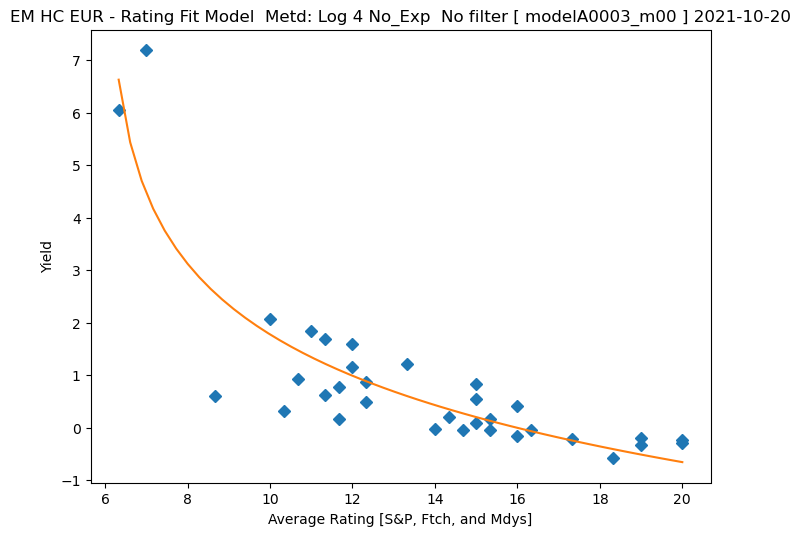

<Figure size 432x288 with 0 Axes>

x loop
x 1


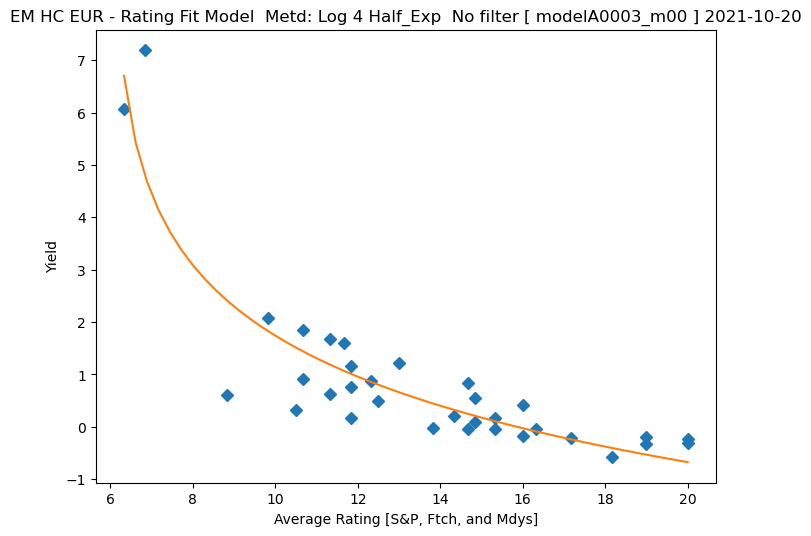

<Figure size 432x288 with 0 Axes>

x loop
x 2


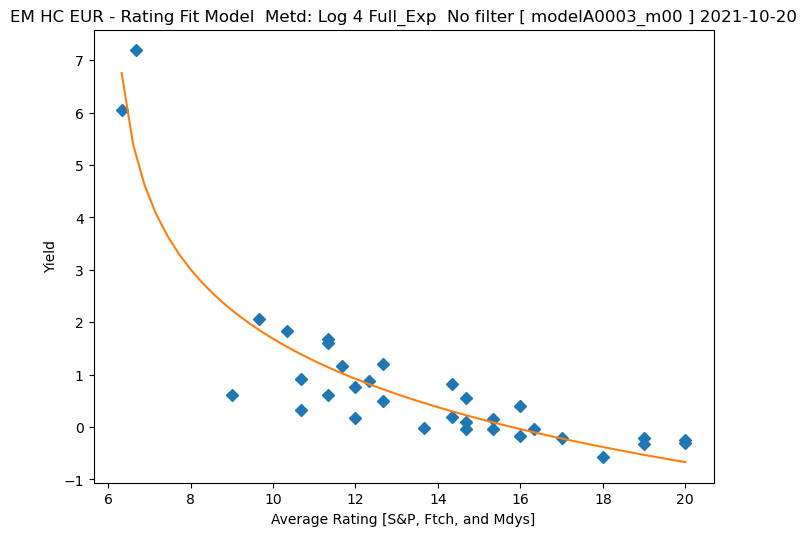

<Figure size 432x288 with 0 Axes>

1
6
33
x loop
x 0


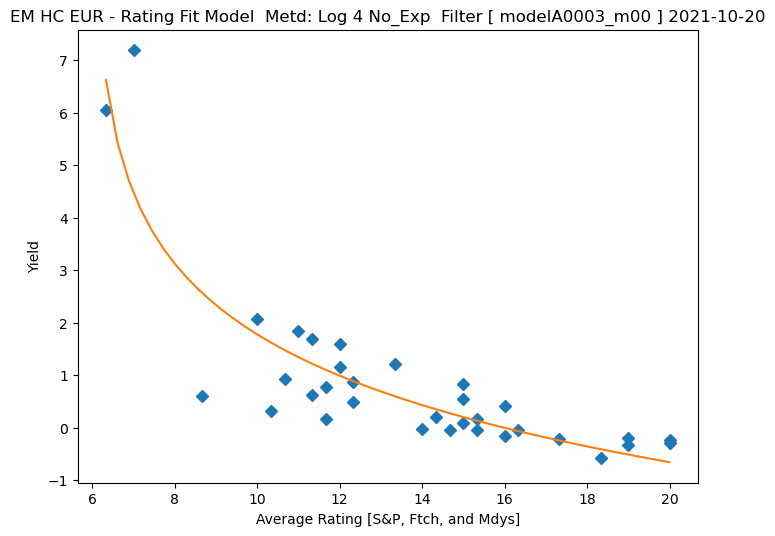

<Figure size 432x288 with 0 Axes>

x loop
x 1


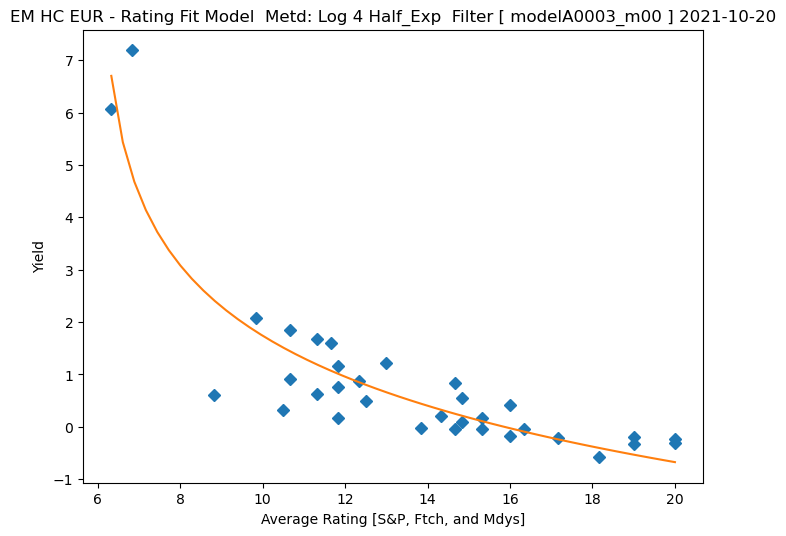

<Figure size 432x288 with 0 Axes>

x loop
x 2


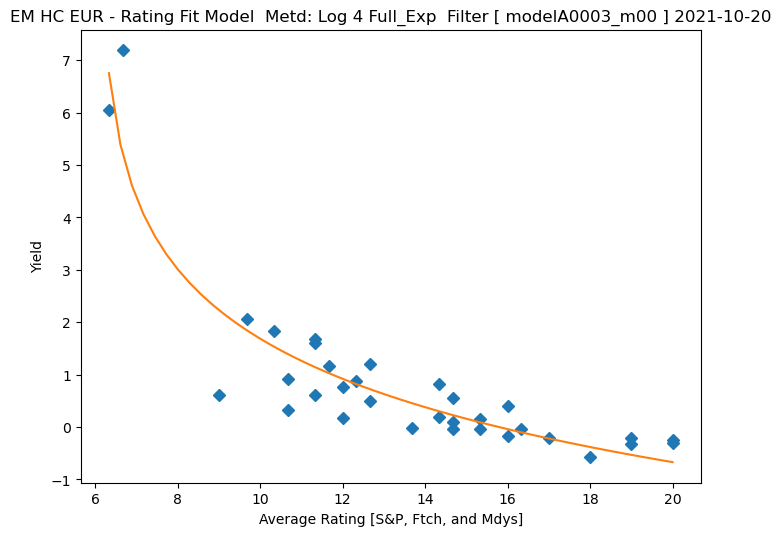

<Figure size 432x288 with 0 Axes>

In [18]:
os.chdir('K:/2020_2431/q/hc_report/eur/rating/')
print(os.getcwd())

#first  batch
#logaritmic sin constante, 



def func(x, a, b, c): # x-shifted log
    return a*numpy.log(x + b)+c

            

def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    plt.title(str(title_text))
    plt.xlabel(str(x_label))
    plt.ylabel(str(y_label))
    plt.savefig(location, bbox_inches='tight')
    plt.savefig(str(name)+".jpg", bbox_inches='tight')
    fig_m0101 = plt.figure()
    plt.show()
    plt.close('all') # clean up after using pyplot
    
    

f_parameter_list=[0,6]
f_parameter_list2=[" No filter"," Filter"]
n_expectations_list = ["No_Exp", "Half_Exp","Full_Exp"]
n_expectations_list=list(n_expectations_list)
variable_x_list = ["average_rating_n","average_rating_n_ef0","average_rating_n_ef1"]

########update!--------------
name0 = "modelA0003_m0"
methodology="Metd: Log"
filter_text ="No filter"
legend_text="HC EUR"
expectation_text="F.Expect"
########update!--------------
#parameters
graphWidth = 800
graphHeight = 600


n=0
for f in range(len(f_parameter_list)): 
    f_parameter=(f_parameter_list[f]) 
    print(f)
    print(f_parameter)
    basef = base2[base2.average_rating_n > f_parameter]
    basef = basef.reset_index(drop=True)
    print(len(basef))
    f_parameter_l=(f_parameter_list2[f]) 
    filter_text=str(f_parameter_l)
    
    for x in range(len(variable_x_list)): 
        print("x loop")
        print("x "+str(x))
        f_version=f+3
        x_version=x+1
        x_variable=str(variable_x_list[x])
        x_variable_name = str(n_expectations_list[x])
        x = numpy.array(basef[str(x_variable)])
        y = basef.Yield

        name=str(name0)+str(n)
        p_text=str(p_parameter)
        name_text=str("[ "+name+" ]")
        name=str(name0)+str(f_version)+"1"+str(x_version)
            
        expectation_text=str(x_variable_name)
        title_text=(title_graph+" "+methodology+" "+p_text+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
        location=location_first+name+location_last
        r_name="r_"+name
        
        # alias data to match previous example
        xData = numpy.array(x, dtype=float)
        yData = numpy.array(y, dtype=float)

        def func(x, a, b, c): # x-shifted log
            return a*numpy.log(x + b)+c

        # these are the same as the scipy defaults
        initialParameters = numpy.array([1.0, 1.0, 1.0])

        # curve fit the test data
        fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)
        modelPredictions = func(xData, *fittedParameters) 
        absError = modelPredictions - yData


        # these are the same as the scipy defaults
        initialParameters = numpy.array([1.0, 1.0, 1.0])

        # curve fit the test data
        fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters,maxfev=5000)
        modelPredictions = func(xData, *fittedParameters) 
        absError = modelPredictions - yData

        basef['new_column'] = func(xData, *fittedParameters) 
        ########update!--------------
        basef['r_new_column'] = basef['new_column']-basef['cds_latest']
        ########---------------------
        basef.rename(columns={'new_column':str(name)}, inplace=True)
        basef.rename(columns={'r_new_column':str(r_name)}, inplace=True)
        base2=pd.merge(base2, basef[['country',str(name),str(r_name),]],  how='left', left_on=['country'], right_on = ['country']) 
            
        ModelAndScatterPlot(graphWidth, graphHeight)
        initialParameters = numpy.array([1.0, 1.0, 1.0])
       
        del x 
        del y 
        del xData
        del yData
        del name
        del r_name



#del ModelAndScatterPlot        
# first the raw data as a scatter plot
#axes.plot(xData, yData,  'D')

# create data for the fitted equation plot
#xModel = numpy.linspace(min(xData), max(xData))
#yModel = func(xModel, *fittedParameters)


#SE = numpy.square(absError) # squared errors
#MSE = numpy.mean(SE) # mean squared errors
#RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
#Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))

#print('Parameters:', fittedParameters)
#print('RMSE:', RMSE)
#print('R-squared:', Rsquared)
#print(modelPredictions)

In [19]:
#print(xData)
#print(yData)
#xData.to_clipboard()
#yData.to_clipboard()

NameError: name 'xData' is not defined

In [20]:
#os.chdir('K:/2020_2431/q/cds_report/images/rating_fit')
os.chdir('K:/2020_2431/q/hc_report/eur/rating/report/')
print(os.getcwd())
print(os.getcwd())
#K:\2020_2431\q\hc_report\usd\rating\report
#K:\2020_2431\q\hc_report\usd\rating\report
final_location_first = ("K:\\2020_2431\\q\\hc_report\\eur\\rating\\report\\pdf\\")
final_location_last = '.pdf'
####SERIES 110  

#modelA0003_m0131_fig

model = 'modelA0003_m0'
p_parameter_list=[1] 


loop_list=p_parameter_list
for x in range(len(loop_list)):      
    m_iteration=str(loop_list[x])  
    print(m_iteration)
    
    #cds  #######
    list_im = [str(model+"3"+m_iteration+"1_fig.jpg"),str(model+"3"+m_iteration+"2_fig.jpg"),str(model+"3"+m_iteration+"3_fig.jpg")]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save(str("log_"+m_iteration+"0s_fig.jpg"))   


    del list_im
    del imgs
    del min_shape
    del imgs_comb

    list_im = [str(model+"4"+m_iteration+"1_fig.jpg"),str(model+"3"+m_iteration+"2_fig.jpg"),str(model+"3"+m_iteration+"3_fig.jpg")]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save(str("log_"+m_iteration+"0Fs_fig.jpg")) 

    del list_im
    del imgs
    del min_shape
    del imgs_comb

    list_im = [str("log_"+m_iteration+"0s_fig.jpg"),str("log_"+m_iteration+"0Fs_fig.jpg")]
    imgs    = [ PIL.Image.open(i) for i in list_im ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save(str(m_iteration+"0FCs_fig.jpg"))   
    imgs_comb.save( str(final_location_first+"log_"+m_iteration+"0s_fig"+final_location_last) )   

    del list_im
    del imgs
    del min_shape
    del imgs_comb

    
    

print("Complete!!!!")



K:\2020_2431\q\hc_report\eur\rating\report
K:\2020_2431\q\hc_report\eur\rating\report
1
Complete!!!!


In [21]:
####output aggregate



    
source_dir = 'K:/2020_2431/q/hc_report/eur/rating/report/pdf/'
source_dir2 = 'K:/2020_2431/q/hc_report/eur/rating/report/comp/'
merger = PdfFileMerger()

for item in os.listdir(source_dir):
    if item.endswith('pdf'):
        #print(item)
        merger.append(source_dir + item)

merger.write(source_dir2 + 'HC_EUR_0002_Rating_charts.pdf')       
merger.close()

# Corss country comparison

In [22]:
#Corss country comparison
#print(base.columns.tolist())
#base_em=base[base.em_dummy==1]
#base_em=base_em.reset_index(drop=True)
#print(base_em)


base3= base2


title_graph="HC EUR - Rating Fit Model "
c_label="HC EUR Country"
y_label="HC EUR 10 Yield"


#file location
location_first = ("K:\\2020_2431\\q\\hc_report\\eur\\rating\\report\\agg\\")
today = str(date.today())+"_"
location_last = '_fig.jpg'
residual="Residual"

#print(df1)
print("Complete!!!")

Complete!!!


# pol

3
    order       country  order_1
0      10        Turkey       10
1      13         Egypt       20
2      26       Morocco       30
3      23       Romania       40
4      11        Russia       50
5       0        Mexico       60
6       2          Peru       70
7      31     Indonesia       80
8      19       Croatia       90
9      32   Philippines      100
10     12  Saudi Arabia      110
11     15       Hungary      120
12      4         Italy      130
13      9        Greece      140
14      1         Chile      150
15     22      Bulgaria      160
16     30         China      170
17     25        Cyprus      180
18     14        Poland      190
19      6      Portugal      200
20     29     Lithuania      210
21     24       Iceland      220
22      5         Spain      230
23     28        Latvia      240
24     27      Slovenia      250
25     16        Israel      260
26     17       Ireland      270
27     20       Finland      280
28     18       Belgium      290
29      

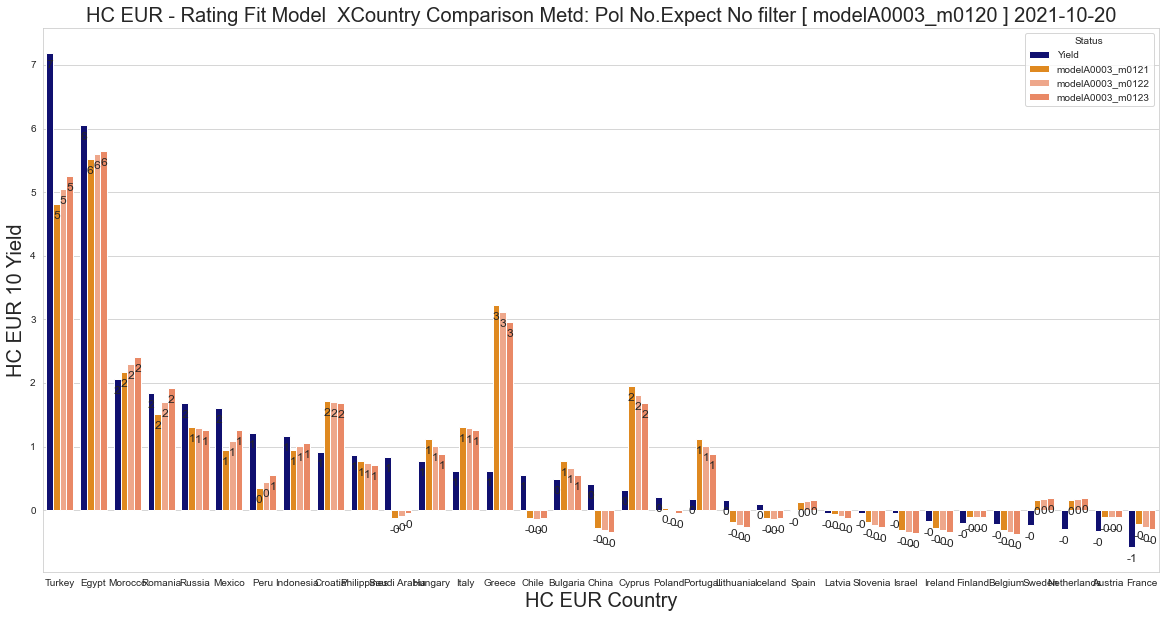

    order       country  order_1
0      10        Turkey       10
1      13         Egypt       20
2      26       Morocco       30
3      23       Romania       40
4      11        Russia       50
5       0        Mexico       60
6       2          Peru       70
7      31     Indonesia       80
8      19       Croatia       90
9      32   Philippines      100
10     12  Saudi Arabia      110
11     15       Hungary      120
12      4         Italy      130
13      9        Greece      140
14      1         Chile      150
15     22      Bulgaria      160
16     30         China      170
17     25        Cyprus      180
18     14        Poland      190
19      6      Portugal      200
20     29     Lithuania      210
21     24       Iceland      220
22      5         Spain      230
23     28        Latvia      240
24     27      Slovenia      250
25     16        Israel      260
26     17       Ireland      270
27     20       Finland      280
28     18       Belgium      290
29      7 

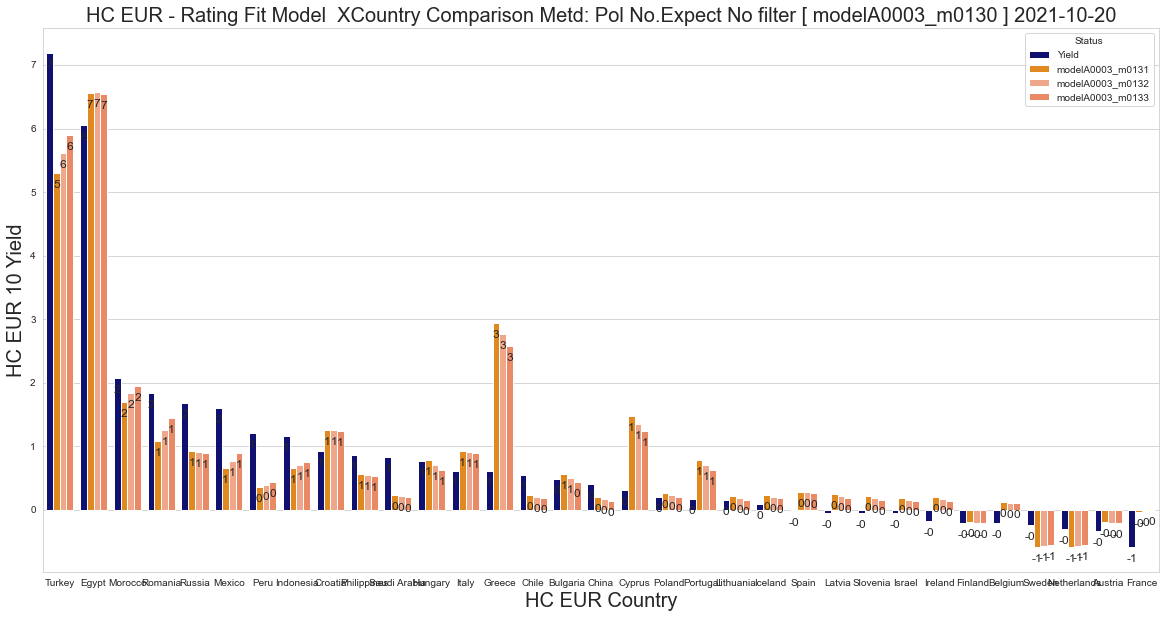

    order       country  order_1
0      10        Turkey       10
1      13         Egypt       20
2      26       Morocco       30
3      23       Romania       40
4      11        Russia       50
5       0        Mexico       60
6       2          Peru       70
7      31     Indonesia       80
8      19       Croatia       90
9      32   Philippines      100
10     12  Saudi Arabia      110
11     15       Hungary      120
12      4         Italy      130
13      9        Greece      140
14      1         Chile      150
15     22      Bulgaria      160
16     30         China      170
17     25        Cyprus      180
18     14        Poland      190
19      6      Portugal      200
20     29     Lithuania      210
21     24       Iceland      220
22      5         Spain      230
23     28        Latvia      240
24     27      Slovenia      250
25     16        Israel      260
26     17       Ireland      270
27     20       Finland      280
28     18       Belgium      290
29      7 

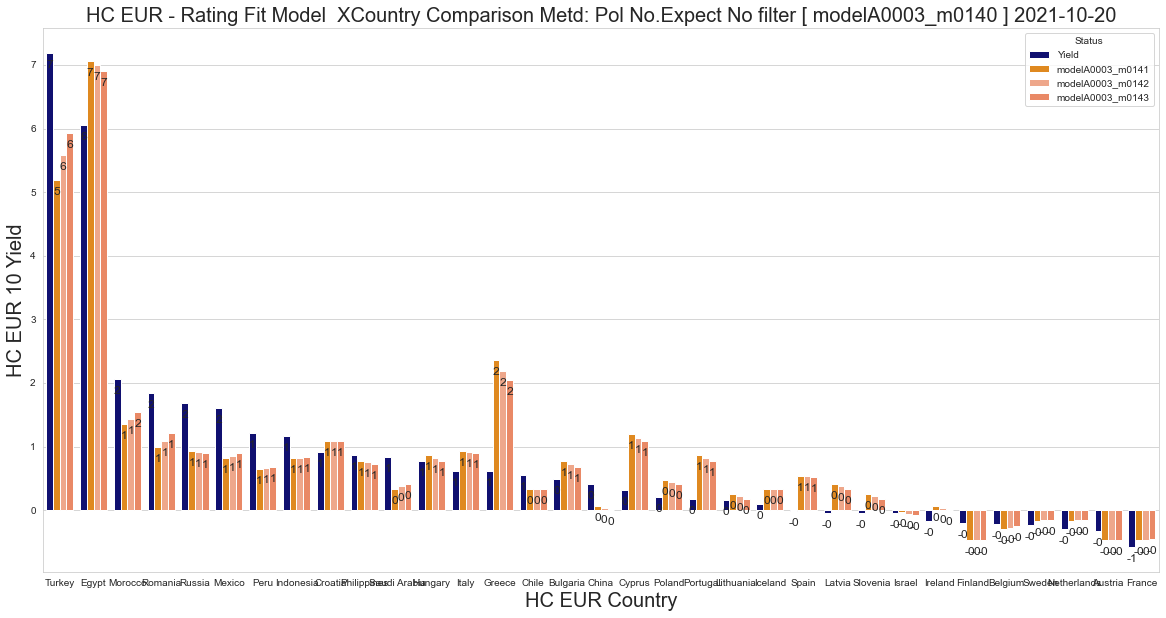

    order       country  order_1
0      10        Turkey       10
1      13         Egypt       20
2      26       Morocco       30
3      23       Romania       40
4      11        Russia       50
5       0        Mexico       60
6       2          Peru       70
7      31     Indonesia       80
8      19       Croatia       90
9      32   Philippines      100
10     12  Saudi Arabia      110
11     15       Hungary      120
12      4         Italy      130
13      9        Greece      140
14      1         Chile      150
15     22      Bulgaria      160
16     30         China      170
17     25        Cyprus      180
18     14        Poland      190
19      6      Portugal      200
20     29     Lithuania      210
21     24       Iceland      220
22      5         Spain      230
23     28        Latvia      240
24     27      Slovenia      250
25     16        Israel      260
26     17       Ireland      270
27     20       Finland      280
28     18       Belgium      290
29      7 

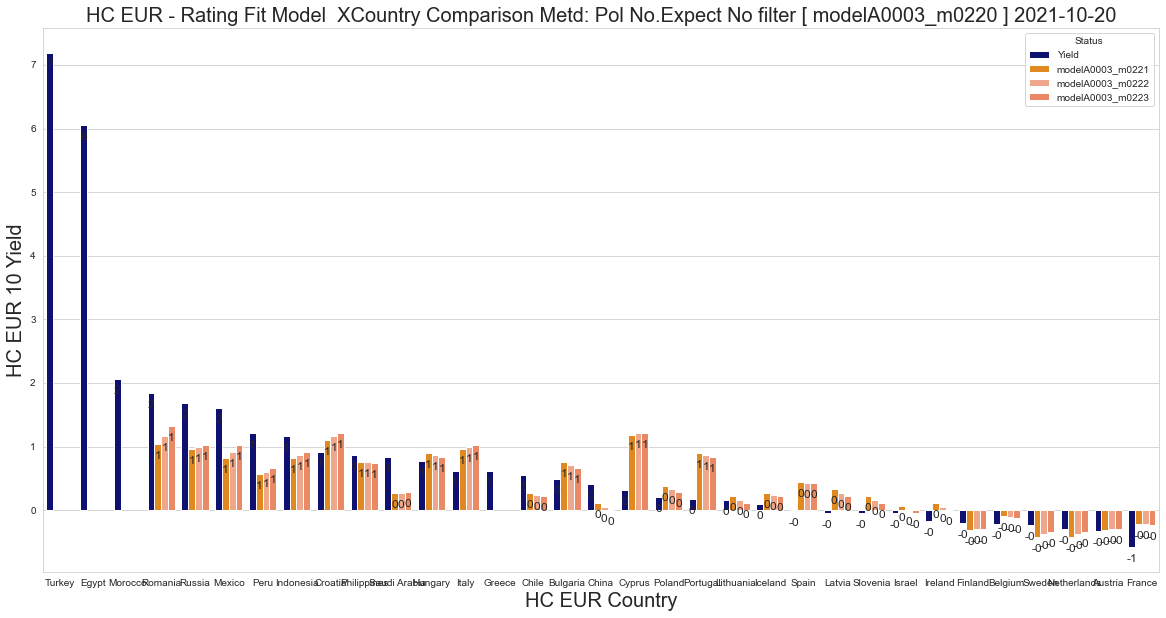

    order       country  order_1
0      10        Turkey       10
1      13         Egypt       20
2      26       Morocco       30
3      23       Romania       40
4      11        Russia       50
5       0        Mexico       60
6       2          Peru       70
7      31     Indonesia       80
8      19       Croatia       90
9      32   Philippines      100
10     12  Saudi Arabia      110
11     15       Hungary      120
12      4         Italy      130
13      9        Greece      140
14      1         Chile      150
15     22      Bulgaria      160
16     30         China      170
17     25        Cyprus      180
18     14        Poland      190
19      6      Portugal      200
20     29     Lithuania      210
21     24       Iceland      220
22      5         Spain      230
23     28        Latvia      240
24     27      Slovenia      250
25     16        Israel      260
26     17       Ireland      270
27     20       Finland      280
28     18       Belgium      290
29      7 

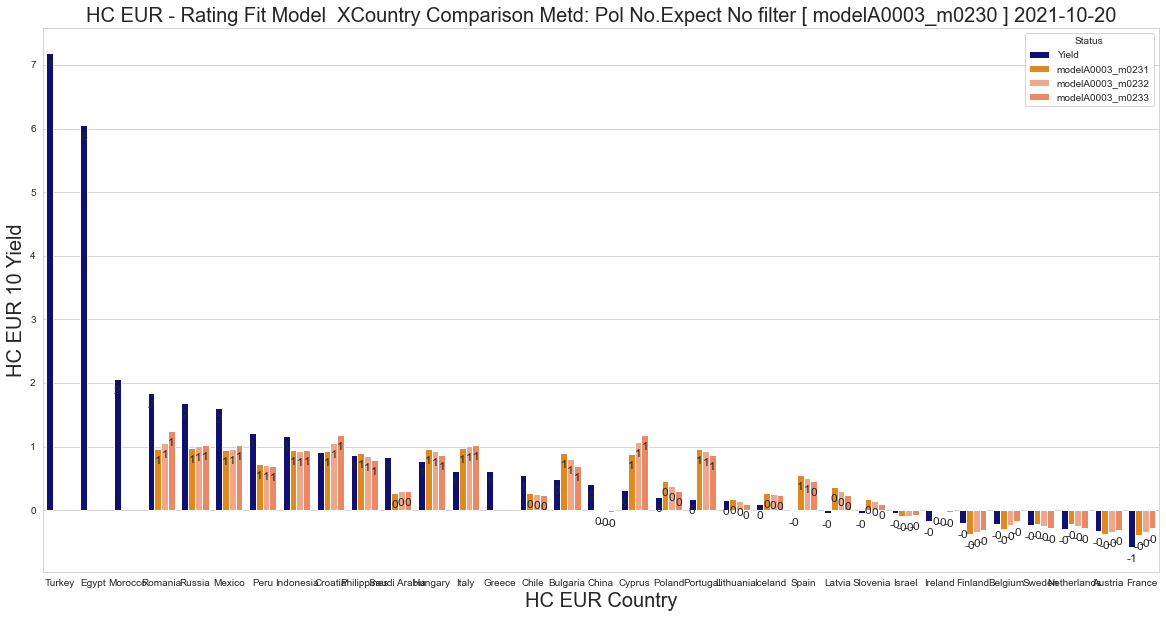

    order       country  order_1
0      10        Turkey       10
1      13         Egypt       20
2      26       Morocco       30
3      23       Romania       40
4      11        Russia       50
5       0        Mexico       60
6       2          Peru       70
7      31     Indonesia       80
8      19       Croatia       90
9      32   Philippines      100
10     12  Saudi Arabia      110
11     15       Hungary      120
12      4         Italy      130
13      9        Greece      140
14      1         Chile      150
15     22      Bulgaria      160
16     30         China      170
17     25        Cyprus      180
18     14        Poland      190
19      6      Portugal      200
20     29     Lithuania      210
21     24       Iceland      220
22      5         Spain      230
23     28        Latvia      240
24     27      Slovenia      250
25     16        Israel      260
26     17       Ireland      270
27     20       Finland      280
28     18       Belgium      290
29      7 

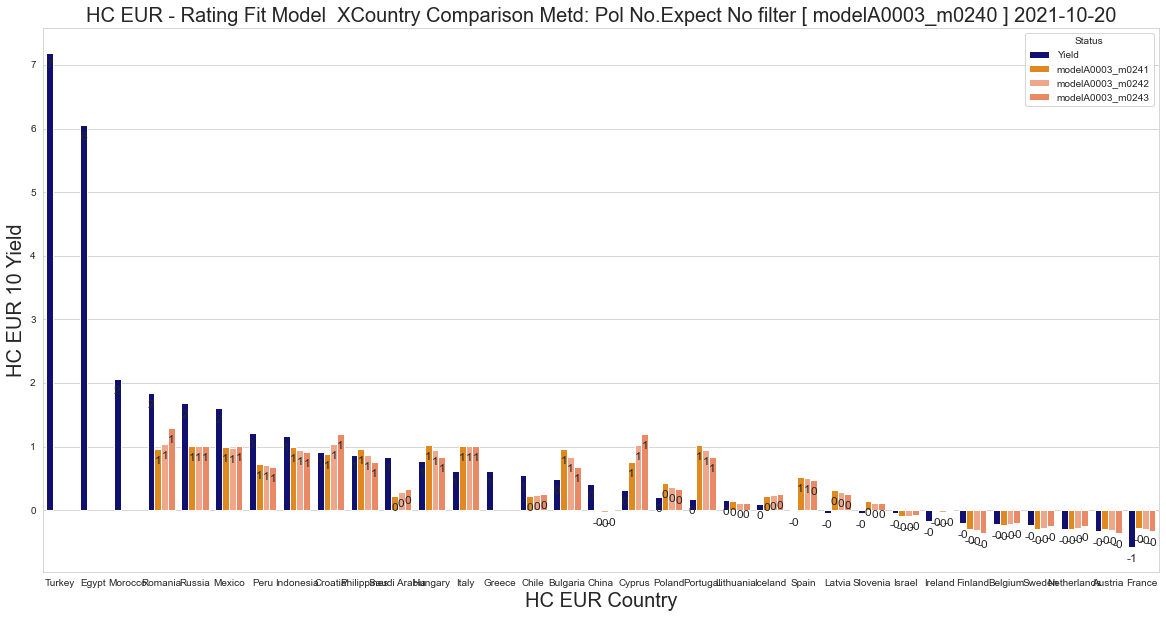

In [23]:
model="modelA0003_m0"

model_type = [1,2]
q_parameter = [2,3,4]

print(len(q_parameter))
#chart=base_em[['country','Yield','modelA0001_m0111','modelA0001_m0112','modelA0001_m0113']]

##model 1 poli | all counntries nf | cds latest | rating x2x3x4
#part1
########update!--------------
#same filter not filter
#sames exmpactisonactios
#different polyniomic levels
#m1x1
#m1x2
#m1x3
#m2x1
#m2x2
#m2x3


########update!--------------
name='modelA0001_m0110'
methodology="Metd: Pol"
p_parameter=2
########---------------------
comparison="XCountry Comparison"
variable_text='latest CDS market value'
filter_text ="No filter"
expectation_text="No.Expect"
        

basef=base3
loop_list=model_type
for x in range(len(loop_list)):      
    m=str(loop_list[x]) 
    for q in range(len(q_parameter)): 
        p=(q_parameter[q])

        chart=basef[['country','Yield',
                     str(str(model)+str(m)+str(p)+"1"),
                     str(str(model)+str(m)+str(p)+"2"),
                     str(str(model)+str(m)+str(p)+"3")]]
        order_t=basef[['country','Yield']]
        order_t = order_t.sort_values(['Yield'], ascending=[False])
        order_t = order_t.reset_index()
        order_t = order_t.rename(columns={"index":"order"})
        order_t['order_1'] = (order_t.index + 1)*10
        del order_t['Yield']
        print(order_t)
        o_list=chart.columns 
        o_list = pd.DataFrame(o_list)
        o_list.columns=["order_sort"]
        o_list.drop(o_list.index[:1], inplace=True)
        o_list = o_list.reset_index()
        o_list = o_list.rename(columns={"index":"order"})
        o_list['order_2'] = (o_list.index + 1)
        print(o_list)


        name=str(str(model)+str(m)+str(p)+"0")
        name_text=str("[ "+name+" ]")
        p_text=str(p_parameter)
        title_text=(title_graph+" "+comparison+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
        location=location_first+name+location_last
        r_name="r_"+name



        chart.set_index('country', inplace=True)
        df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
        df1 = df1.reset_index()
        df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
        df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
        df1['order_3']=(df1['order_1']*df1['order_2'])
        df1 = df1.sort_values(['order_3'], ascending=[True])
        del df1['order_1']
        del df1['order_2']
        #be careful
        df1['Values']=(df1['Values']*1)
        print(df1)

        #large and height
        plt.figure(figsize=(20,10))
        sns.set_style('whitegrid')
        splot=sns.barplot(x='country', hue="Status", y="Values",
                          palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
        plt.ylabel(str(y_label), size=20)
        plt.xlabel(str(c_label), size=20)
        plt.title(str(title_text), size=20)

        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           size=12,
                           xytext = (0, -12), 
                           textcoords = 'offset points')
        #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
        plt.savefig(location, bbox_inches='tight')
        print(location)
        plt.show()

    order       country  order_1
0       9        Greece       10
1      25        Cyprus       20
2       6      Portugal       30
3      19       Croatia       40
4       4         Italy       50
5       8   Netherlands       60
6       7        Sweden       70
7       3        France       80
8      15       Hungary       90
9      21       Austria      100
10     26       Morocco      110
11     22      Bulgaria      120
12      5         Spain      130
13     20       Finland      140
14     28        Latvia      150
15     32   Philippines      160
16     23       Romania      170
17     18       Belgium      180
18     17       Ireland      190
19     31     Indonesia      200
20     27      Slovenia      210
21     14        Poland      220
22     24       Iceland      230
23     16        Israel      240
24     29     Lithuania      250
25     11        Russia      260
26     13         Egypt      270
27      0        Mexico      280
28      1         Chile      290
29     30 

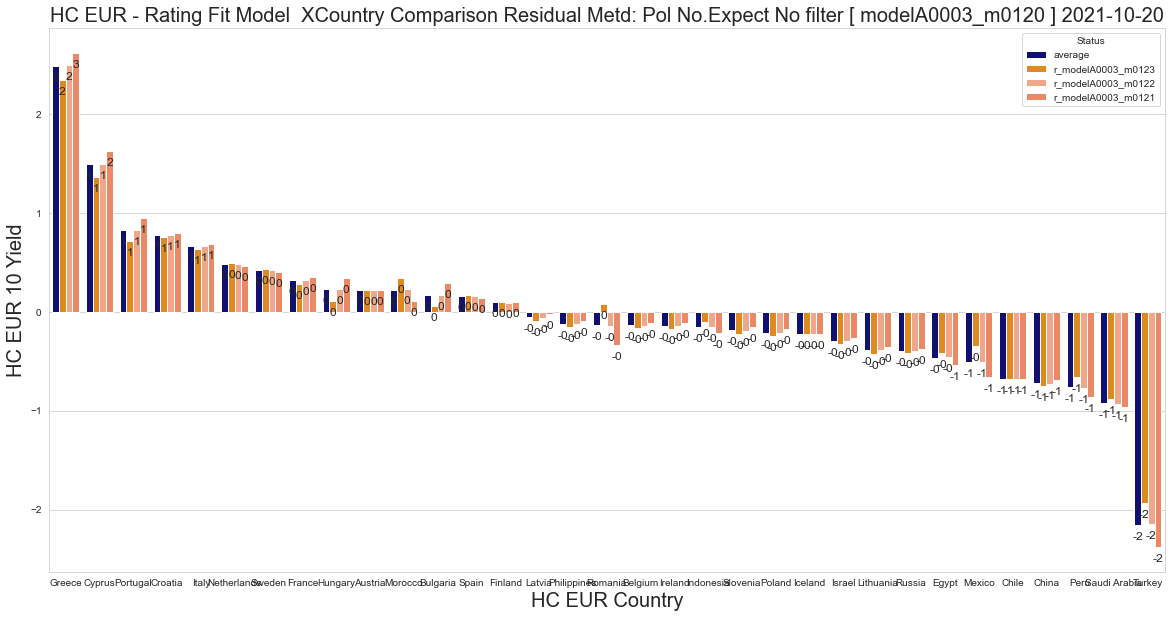

Complete!!!
    order       country  order_1
0       9        Greece       10
1      25        Cyprus       20
2       3        France       30
3       6      Portugal       40
4      13         Egypt       50
5      17       Ireland       60
6      19       Croatia       70
7      18       Belgium       80
8       5         Spain       90
9       4         Italy      100
10     28        Latvia      110
11     27      Slovenia      120
12     16        Israel      130
13     21       Austria      140
14     24       Iceland      150
15     14        Poland      160
16     29     Lithuania      170
17     22      Bulgaria      180
18     20       Finland      190
19     15       Hungary      200
20     30         China      210
21     26       Morocco      220
22      8   Netherlands      230
23     32   Philippines      240
24      7        Sweden      250
25      1         Chile      260
26     31     Indonesia      270
27     23       Romania      280
28     12  Saudi Arabia      29

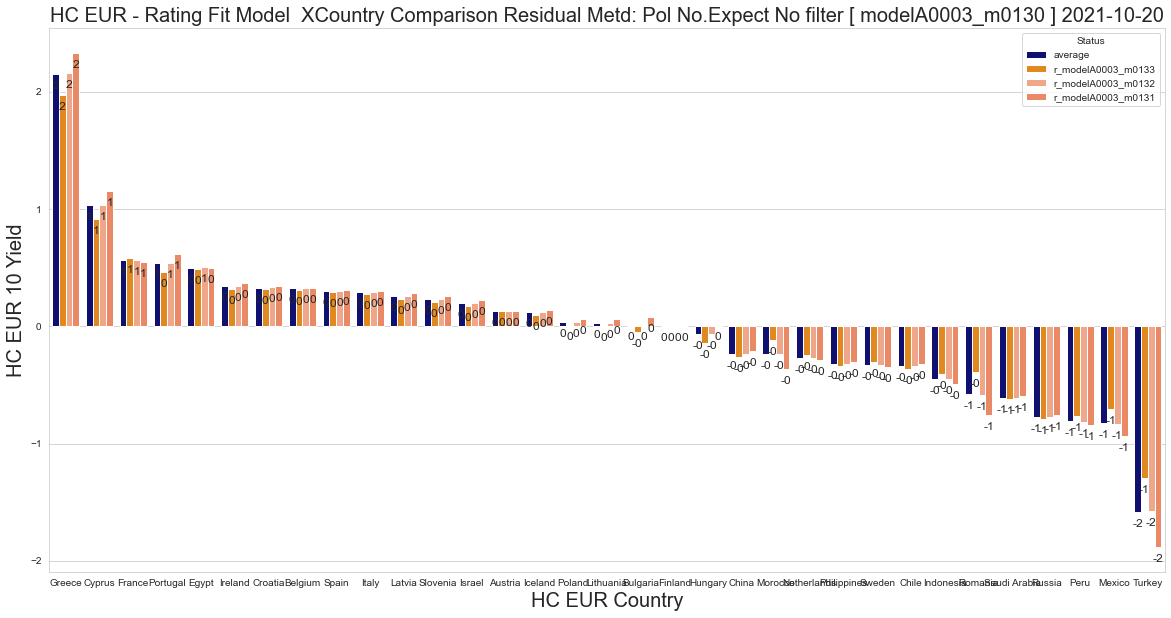

Complete!!!
    order       country  order_1
0       9        Greece       10
1      13         Egypt       20
2      25        Cyprus       30
3       6      Portugal       40
4       5         Spain       50
5      28        Latvia       60
6       4         Italy       70
7      27      Slovenia       80
8      24       Iceland       90
9      14        Poland      100
10     22      Bulgaria      110
11     17       Ireland      120
12     19       Croatia      130
13      8   Netherlands      140
14      3        France      150
15      7        Sweden      160
16     29     Lithuania      170
17     15       Hungary      180
18     16        Israel      190
19     18       Belgium      200
20     32   Philippines      210
21     21       Austria      220
22      1         Chile      230
23     20       Finland      240
24     31     Indonesia      250
25     30         China      260
26     12  Saudi Arabia      270
27      2          Peru      280
28     26       Morocco      29

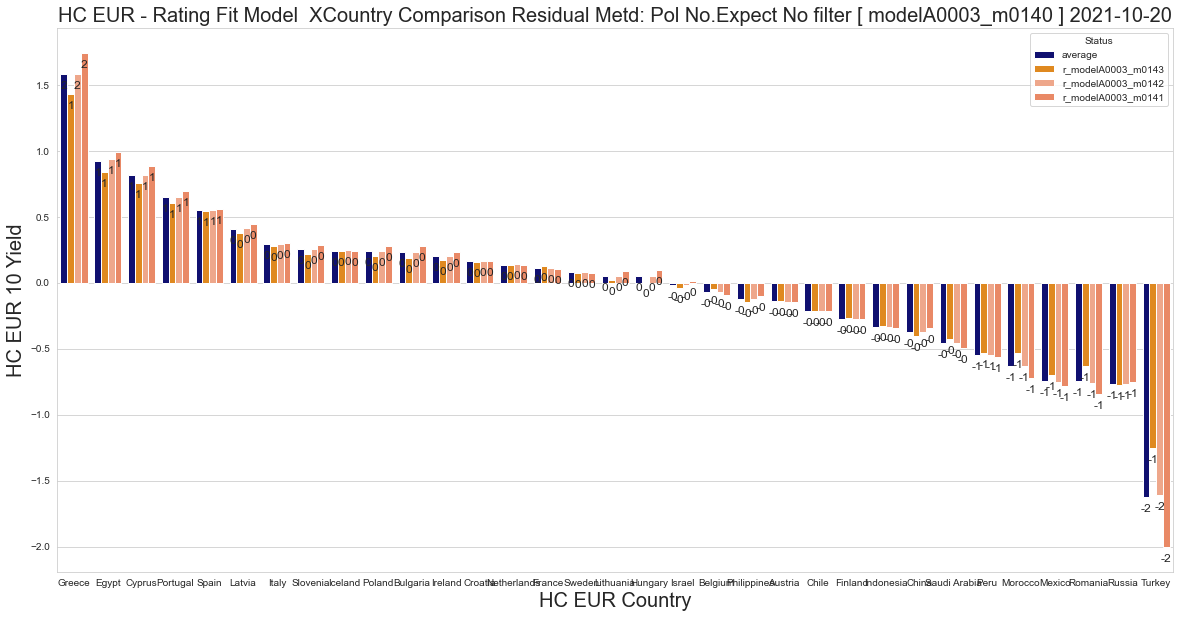

Complete!!!
    order       country  order_1
0      25        Cyprus       10
1       6      Portugal       20
2       5         Spain       30
3       4         Italy       40
4       3        France       50
5      28        Latvia       60
6      19       Croatia       70
7      17       Ireland       80
8      22      Bulgaria       90
9      27      Slovenia      100
10     24       Iceland      110
11     14        Poland      120
12     18       Belgium      130
13     15       Hungary      140
14     16        Israel      150
15     21       Austria      160
16     29     Lithuania      170
17      8   Netherlands      180
18     20       Finland      190
19     32   Philippines      200
20      7        Sweden      210
21     31     Indonesia      220
22      1         Chile      230
23     30         China      240
24     12  Saudi Arabia      250
25      2          Peru      260
26     23       Romania      270
27      0        Mexico      280
28     11        Russia      29

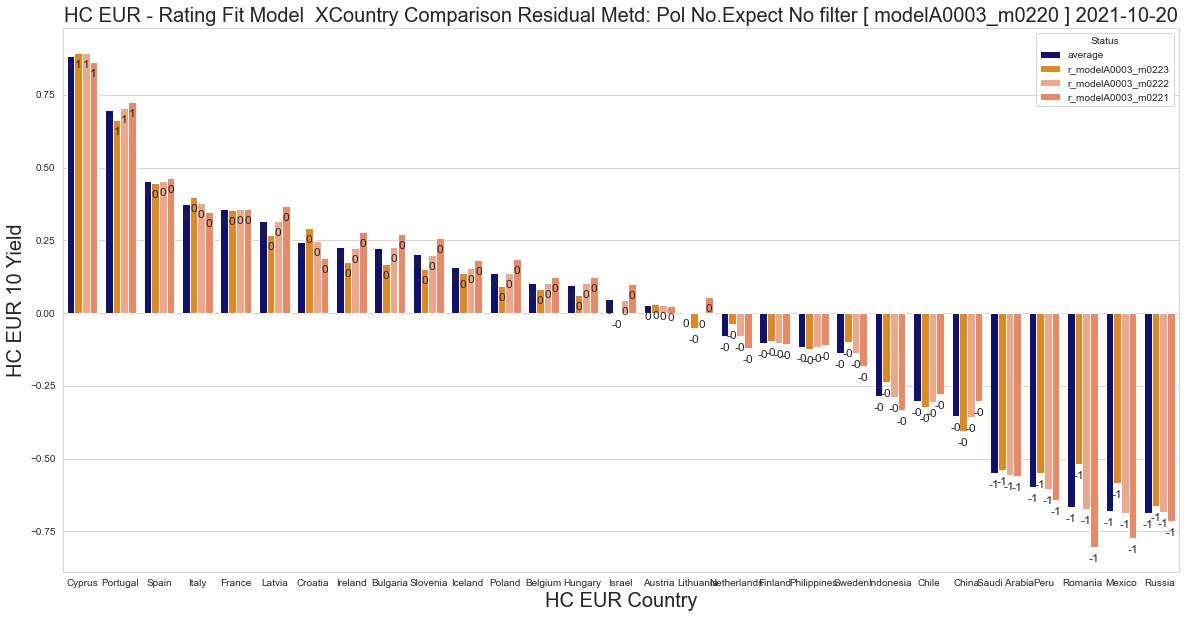

Complete!!!
    order       country  order_1
0       6      Portugal       10
1      25        Cyprus       20
2       5         Spain       30
3       4         Italy       40
4      28        Latvia       50
5      22      Bulgaria       60
6       3        France       70
7      14        Poland       80
8      27      Slovenia       90
9      24       Iceland      100
10     17       Ireland      110
11     15       Hungary      120
12     19       Croatia      130
13      8   Netherlands      140
14      7        Sweden      150
15     21       Austria      160
16     29     Lithuania      170
17     18       Belgium      180
18     32   Philippines      190
19     16        Israel      200
20     20       Finland      210
21     31     Indonesia      220
22      1         Chile      230
23     30         China      240
24      2          Peru      250
25     12  Saudi Arabia      260
26      0        Mexico      270
27     11        Russia      280
28     23       Romania      29

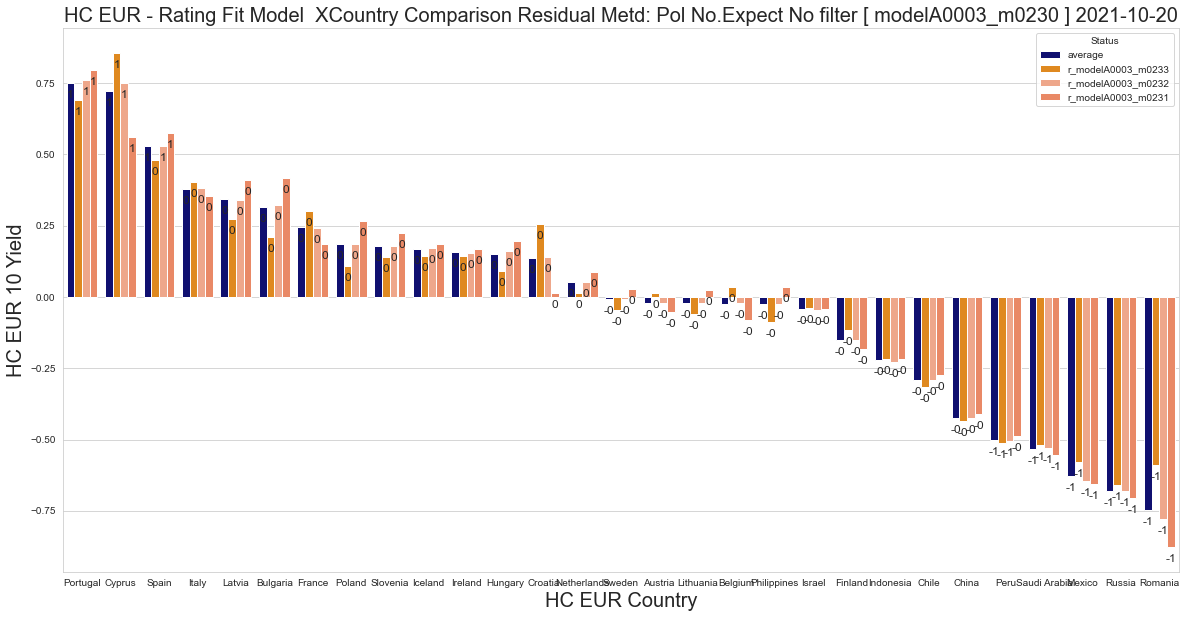

Complete!!!
    order       country  order_1
0       6      Portugal       10
1      25        Cyprus       20
2       5         Spain       30
3       4         Italy       40
4      22      Bulgaria       50
5      28        Latvia       60
6       3        France       70
7      14        Poland       80
8      15       Hungary       90
9      27      Slovenia      100
10     24       Iceland      110
11     17       Ireland      120
12     19       Croatia      130
13      8   Netherlands      140
14     21       Austria      150
15     18       Belgium      160
16     32   Philippines      170
17     29     Lithuania      180
18      7        Sweden      190
19     16        Israel      200
20     20       Finland      210
21     31     Indonesia      220
22      1         Chile      230
23     30         China      240
24      2          Peru      250
25     12  Saudi Arabia      260
26      0        Mexico      270
27     11        Russia      280
28     23       Romania      29

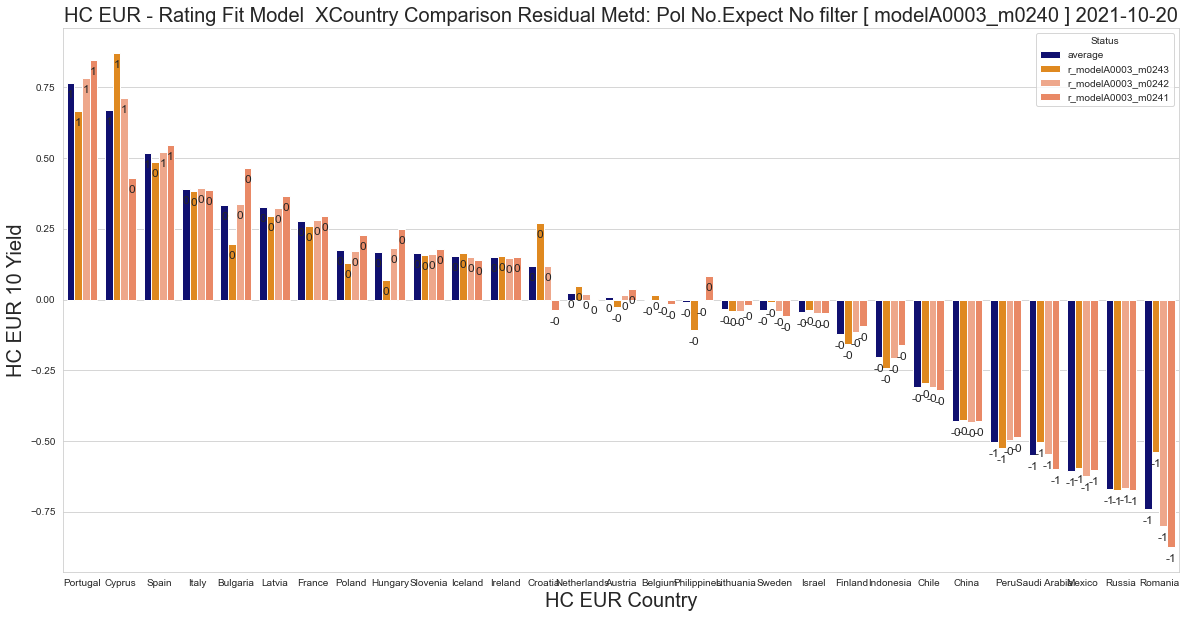

Complete!!!


In [24]:
#part2 Residual
########update!--------------
#chart=base_em[['country','r_modelA0001_m0111','r_modelA0001_m0112','r_modelA0001_m0113']]

########---------------------
comparison="XCountry Comparison"
variable_text='latest 10Y  market value'
filter_text ="No filter"
expectation_text="No.Expect"
        
        
basef=base3
loop_list=model_type
for x in range(len(loop_list)):      
    m=str(loop_list[x]) 
    for q in range(len(q_parameter)): 
        p=(q_parameter[q])


        chart=basef[['country',
                     str("r_"+str(model)+str(m)+str(p)+"1"),
                     str("r_"+str(model)+str(m)+str(p)+"2"),
                     str("r_"+str(model)+str(m)+str(p)+"3")]]
    
        order_p=chart
        order_p['average']=order_p[[str("r_"+str(model)+str(m)+str(p)+"1"),
                                    str("r_"+str(model)+str(m)+str(p)+"2"),
                                    str("r_"+str(model)+str(m)+str(p)+"3")]].mean(axis=1)
        order_t=order_p[['country','average']]
        order_t = order_t.sort_values(['average'], ascending=[False])
        order_t = order_t.reset_index()
        order_t = order_t.rename(columns={"index":"order"})
        order_t['order_1'] = (order_t.index + 1)*10
        del order_t['average']
        print(order_t)
        o_list=chart.columns 
        o_list = pd.DataFrame(o_list)
        o_list.columns=["order_sort"]
        o_list.drop(o_list.index[:1], inplace=True)
        o_list = o_list.reset_index()
        o_list = o_list.rename(columns={"index":"order"})
        o_list['order_2'] = (o_list.index + 1)
        o_list = o_list.sort_values(['order_2'], ascending=[False])
        o_list = o_list.reset_index()
        o_list['order_2'] = (o_list.index + 1)

        print(o_list)


        name=str(str(model)+str(m)+str(p)+"0")
        name_text=str("[ "+name+" ]")
        p_text=str(p_parameter)
        title_text=(title_graph+" "+comparison+" "+residual+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
        location=location_first+name+residual+location_last
        r_name="r_"+name



        chart.set_index('country', inplace=True)
        df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
        df1 = df1.reset_index()
        df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
        df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
        df1['order_3']=(df1['order_1']*df1['order_2'])
        df1 = df1.sort_values(['order_3'], ascending=[True])
        del df1['order_1']
        del df1['order_2']
        #be careful
        df1['Values']=(df1['Values']*1)
        print(df1)

        #large and height
        plt.figure(figsize=(20,10))
        sns.set_style('whitegrid')
        splot=sns.barplot(x='country', hue="Status", y="Values",
                          palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
        plt.ylabel(str(y_label), size=20)
        plt.xlabel(str(c_label), size=20)
        plt.title(str(title_text), size=20)

        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           size=12,
                           xytext = (0, -12), 
                           textcoords = 'offset points')
        #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
        plt.savefig(location, bbox_inches='tight')
        plt.show()

        print("Complete!!!")

# LOG

1
    order       country  order_1
0      10        Turkey       10
1      13         Egypt       20
2      26       Morocco       30
3      23       Romania       40
4      11        Russia       50
5       0        Mexico       60
6       2          Peru       70
7      31     Indonesia       80
8      19       Croatia       90
9      32   Philippines      100
10     12  Saudi Arabia      110
11     15       Hungary      120
12      4         Italy      130
13      9        Greece      140
14      1         Chile      150
15     22      Bulgaria      160
16     30         China      170
17     25        Cyprus      180
18     14        Poland      190
19      6      Portugal      200
20     29     Lithuania      210
21     24       Iceland      220
22      5         Spain      230
23     28        Latvia      240
24     27      Slovenia      250
25     16        Israel      260
26     17       Ireland      270
27     20       Finland      280
28     18       Belgium      290
29      

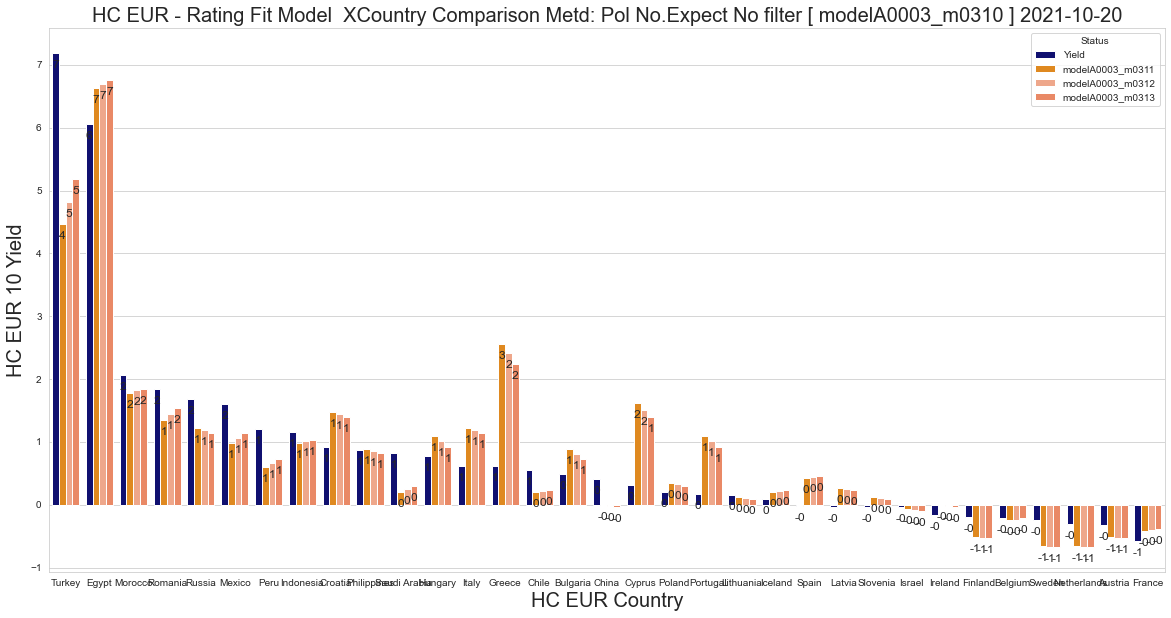

    order       country  order_1
0      10        Turkey       10
1      13         Egypt       20
2      26       Morocco       30
3      23       Romania       40
4      11        Russia       50
5       0        Mexico       60
6       2          Peru       70
7      31     Indonesia       80
8      19       Croatia       90
9      32   Philippines      100
10     12  Saudi Arabia      110
11     15       Hungary      120
12      4         Italy      130
13      9        Greece      140
14      1         Chile      150
15     22      Bulgaria      160
16     30         China      170
17     25        Cyprus      180
18     14        Poland      190
19      6      Portugal      200
20     29     Lithuania      210
21     24       Iceland      220
22      5         Spain      230
23     28        Latvia      240
24     27      Slovenia      250
25     16        Israel      260
26     17       Ireland      270
27     20       Finland      280
28     18       Belgium      290
29      7 

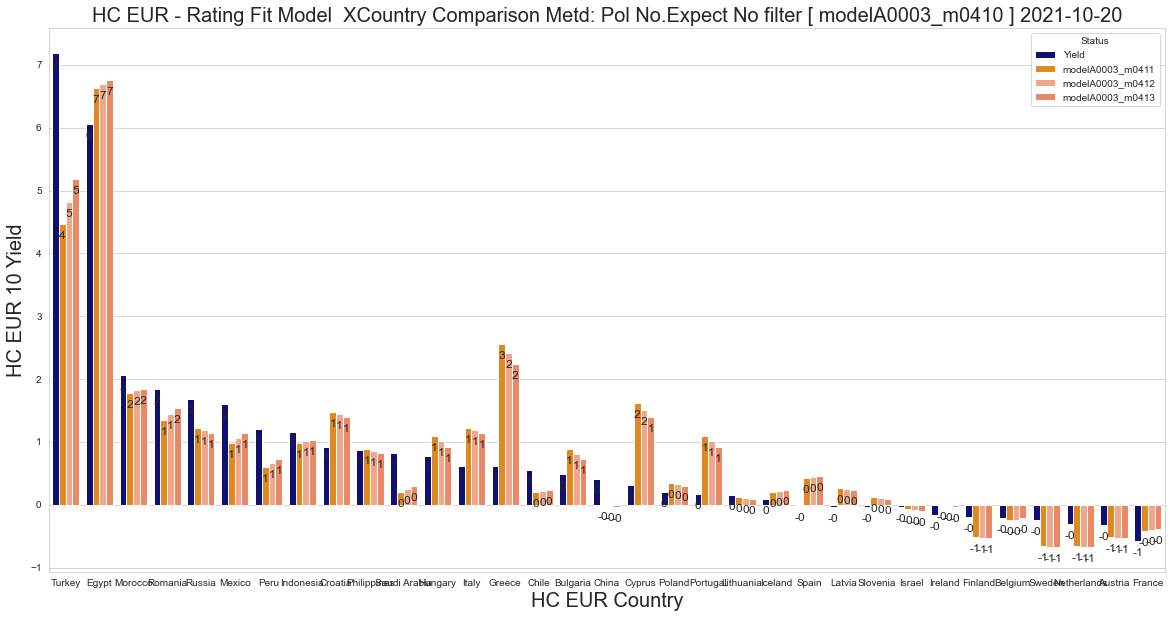

In [25]:
model="modelA0003_m0"

model_type = [3,4]
q_parameter = [1]

print(len(q_parameter))
#chart=base_em[['country','Yield','modelA0001_m0111','modelA0001_m0112','modelA0001_m0113']]

##model 1 poli | all counntries nf | cds latest | rating x2x3x4
#part1
########update!--------------
#same filter not filter
#sames exmpactisonactios
#different polyniomic levels
#m1x1
#m1x2
#m1x3
#m2x1
#m2x2
#m2x3


########update!--------------
name='modelA0001_m0110'
methodology="Metd: Pol"
p_parameter=2
########---------------------
comparison="XCountry Comparison"
variable_text='latest 10Y market value'
filter_text ="No filter"
expectation_text="No.Expect"
        

basef=base3
loop_list=model_type
for x in range(len(loop_list)):      
    m=str(loop_list[x]) 
    for q in range(len(q_parameter)): 
        p=(q_parameter[q])

        chart=basef[['country','Yield',
                     str(str(model)+str(m)+str(p)+"1"),
                     str(str(model)+str(m)+str(p)+"2"),
                     str(str(model)+str(m)+str(p)+"3")]]
        order_t=basef[['country','Yield']]
        order_t = order_t.sort_values(['Yield'], ascending=[False])
        order_t = order_t.reset_index()
        order_t = order_t.rename(columns={"index":"order"})
        order_t['order_1'] = (order_t.index + 1)*10
        del order_t['Yield']
        print(order_t)
        o_list=chart.columns 
        o_list = pd.DataFrame(o_list)
        o_list.columns=["order_sort"]
        o_list.drop(o_list.index[:1], inplace=True)
        o_list = o_list.reset_index()
        o_list = o_list.rename(columns={"index":"order"})
        o_list['order_2'] = (o_list.index + 1)
        print(o_list)


        name=str(str(model)+str(m)+str(p)+"0")
        name_text=str("[ "+name+" ]")
        p_text=str(p_parameter)
        title_text=(title_graph+" "+comparison+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
        location=location_first+name+location_last
        r_name="r_"+name



        chart.set_index('country', inplace=True)
        df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
        df1 = df1.reset_index()
        df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
        df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
        df1['order_3']=(df1['order_1']*df1['order_2'])
        df1 = df1.sort_values(['order_3'], ascending=[True])
        del df1['order_1']
        del df1['order_2']
        #be careful
        df1['Values']=(df1['Values']*1)
        print(df1)

        #large and height
        plt.figure(figsize=(20,10))
        sns.set_style('whitegrid')
        splot=sns.barplot(x='country', hue="Status", y="Values",
                          palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
        plt.ylabel(str(y_label), size=20)
        plt.xlabel(str(c_label), size=20)
        plt.title(str(title_text), size=20)

        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           size=12,
                           xytext = (0, -12), 
                           textcoords = 'offset points')
        #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
        plt.savefig(location, bbox_inches='tight')
        print(location)
        plt.show()
        
        
        

    order       country  order_1
0       7        Sweden       10
1      21       Austria       20
2       8   Netherlands       30
3      20       Finland       40
4      18       Belgium       50
5      17       Ireland       60
6       3        France       70
7       6      Portugal       80
8       5         Spain       90
9      30         China      100
10     32   Philippines      110
11     16        Israel      120
12     22      Bulgaria      130
13     14        Poland      140
14     28        Latvia      150
15     24       Iceland      160
16      1         Chile      170
17     15       Hungary      180
18     29     Lithuania      190
19     12  Saudi Arabia      200
20     27      Slovenia      210
21     31     Indonesia      220
22      9        Greece      230
23     19       Croatia      240
24      4         Italy      250
25     23       Romania      260
26      2          Peru      270
27     11        Russia      280
28      0        Mexico      290
29     26 

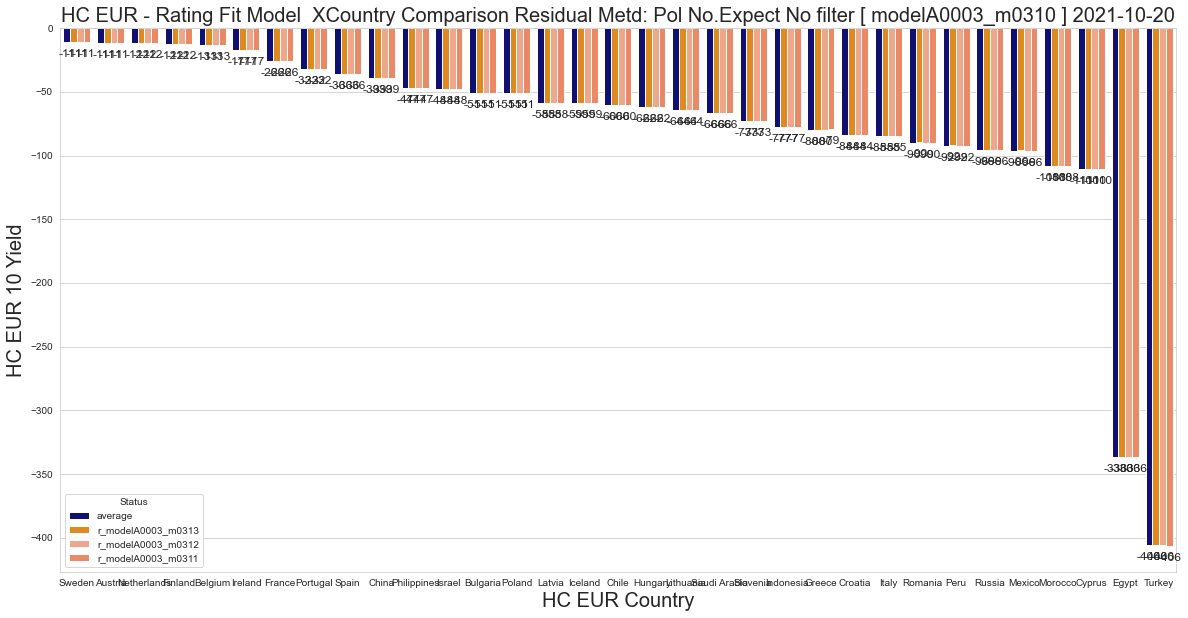

Complete!!!
    order       country  order_1
0       7        Sweden       10
1      21       Austria       20
2       8   Netherlands       30
3      20       Finland       40
4      18       Belgium       50
5      17       Ireland       60
6       3        France       70
7       6      Portugal       80
8       5         Spain       90
9      30         China      100
10     32   Philippines      110
11     16        Israel      120
12     22      Bulgaria      130
13     14        Poland      140
14     28        Latvia      150
15     24       Iceland      160
16      1         Chile      170
17     15       Hungary      180
18     29     Lithuania      190
19     12  Saudi Arabia      200
20     27      Slovenia      210
21     31     Indonesia      220
22      9        Greece      230
23     19       Croatia      240
24      4         Italy      250
25     23       Romania      260
26      2          Peru      270
27     11        Russia      280
28      0        Mexico      29

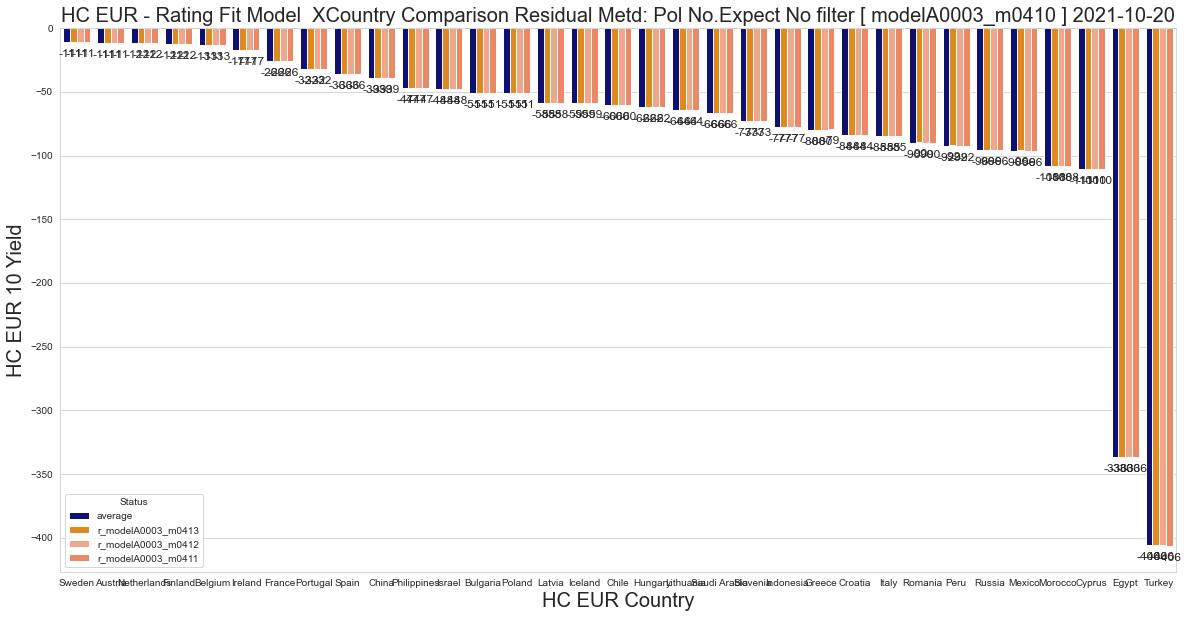

Complete!!!


In [27]:

########update!--------------
#chart=base_em[['country','r_modelA0001_m0111','r_modelA0001_m0112','r_modelA0001_m0113']]

########---------------------
comparison="XCountry Comparison"
variable_text='latest 10Y market value'
filter_text ="No filter"
expectation_text="No.Expect"
        
        
basef=base3
loop_list=model_type
for x in range(len(loop_list)):      
    m=str(loop_list[x]) 
    for q in range(len(q_parameter)): 
        p=(q_parameter[q])


        chart=basef[['country',
                     str("r_"+str(model)+str(m)+str(p)+"1"),
                     str("r_"+str(model)+str(m)+str(p)+"2"),
                     str("r_"+str(model)+str(m)+str(p)+"3")]]
    
        order_p=chart
        order_p['average']=order_p[[str("r_"+str(model)+str(m)+str(p)+"1"),
                                    str("r_"+str(model)+str(m)+str(p)+"2"),
                                    str("r_"+str(model)+str(m)+str(p)+"3")]].mean(axis=1)
        order_t=order_p[['country','average']]
        order_t = order_t.sort_values(['average'], ascending=[False])
        order_t = order_t.reset_index()
        order_t = order_t.rename(columns={"index":"order"})
        order_t['order_1'] = (order_t.index + 1)*10
        del order_t['average']
        print(order_t)
        o_list=chart.columns 
        o_list = pd.DataFrame(o_list)
        o_list.columns=["order_sort"]
        o_list.drop(o_list.index[:1], inplace=True)
        o_list = o_list.reset_index()
        o_list = o_list.rename(columns={"index":"order"})
        o_list['order_2'] = (o_list.index + 1)
        o_list = o_list.sort_values(['order_2'], ascending=[False])
        o_list = o_list.reset_index()
        o_list['order_2'] = (o_list.index + 1)

        print(o_list)


        name=str(str(model)+str(m)+str(p)+"0")
        name_text=str("[ "+name+" ]")
        p_text=str(p_parameter)
        title_text=(title_graph+" "+comparison+" "+residual+" "+methodology+" "+expectation_text+" "+filter_text+" "+name_text+" "+end)
        location=location_first+name+residual+location_last
        r_name="r_"+name



        chart.set_index('country', inplace=True)
        df1 = chart.stack().reset_index().set_index('country').rename(columns={'level_1': 'Status', 0: 'Values'})
        df1 = df1.reset_index()
        df1=pd.merge(df1, order_t[['country','order_1']],  how='left', left_on=['country'], right_on = ['country']) 
        df1=pd.merge(df1, o_list[['order_sort','order_2']],  how='left', left_on=['Status'], right_on = ['order_sort']) 
        df1['order_3']=(df1['order_1']*df1['order_2'])
        df1 = df1.sort_values(['order_3'], ascending=[True])
        del df1['order_1']
        del df1['order_2']
        #be careful
        df1['Values']=(df1['Values']*1)
        print(df1)

        #large and height
        plt.figure(figsize=(20,10))
        sns.set_style('whitegrid')
        splot=sns.barplot(x='country', hue="Status", y="Values",
                          palette=["navy","darkorange","lightsalmon","coral","lightsalmon","darkorange","lightsalmon","coral"], data=df1)
        plt.ylabel(str(y_label), size=20)
        plt.xlabel(str(c_label), size=20)
        plt.title(str(title_text), size=20)

        for p in splot.patches:
            splot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           size=12,
                           xytext = (0, -12), 
                           textcoords = 'offset points')
        #plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
        plt.savefig(location, bbox_inches='tight')
        plt.show()

        print("Complete!!!")

# Join charts

In [28]:
#asdasdads
#K:\2020_2431\q\cds_report\images\rating_fit
    
    
#part 3 pdf ALL COUNTRUES
os.chdir('K:/2020_2431/q/hc_report/eur/rating/report/agg')
print(os.getcwd())

    
final_location_first = ("K:\\2020_2431\\q\\hc_report\\eur\\rating\\report\\agg2\\")
final_location_last = '.pdf'

   

#######
list_im = ["modelA0003_m0120_fig.jpg","modelA0003_m0120Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0003_m0120A_fig"+final_location_last) )    



#######
list_im = ["modelA0003_m0130_fig.jpg","modelA0003_m0130Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0003_m0130A_fig"+final_location_last) )    



#######
list_im = ["modelA0003_m0140_fig.jpg","modelA0003_m0140Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0003_m0140A_fig"+final_location_last) )    




#######
list_im = ["modelA0003_m0220_fig.jpg","modelA0003_m0220Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0003_m0220A_fig"+final_location_last) )    



#######
list_im = ["modelA0003_m0230_fig.jpg","modelA0003_m0230Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0003_m0230A_fig"+final_location_last) )    



#######
list_im = ["modelA0003_m0240_fig.jpg","modelA0003_m0240Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0003_m0240A_fig"+final_location_last) )    

#######
list_im = ["modelA0003_m0310_fig.jpg","modelA0003_m0310Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0003_m0310A_fig"+final_location_last) )   



#######
list_im = ["modelA0003_m0410_fig.jpg","modelA0003_m0410Residual_fig.jpg"]
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( str(final_location_first+"modelA0003_m0410A_fig"+final_location_last) ) 

K:\2020_2431\q\hc_report\eur\rating\report\agg


In [29]:
####output aggregate



    
source_dir = 'K:/2020_2431/q/hc_report/eur/rating/report/agg2/'
source_dir2 = 'K:/2020_2431/q/hc_report/eur/rating/report/comp/'
merger = PdfFileMerger()

for item in os.listdir(source_dir):
    if item.endswith('pdf'):
        #print(item)
        merger.append(source_dir + item)

merger.write(source_dir2 + 'HC_EUR_0001_Rating_Complete.pdf')       
merger.close()

In [30]:
import subprocess

src=r'K:\2020_2431\q\hc_report\eur\rating\report\comp\HC_EUR_0001_Rating_Complete.pdf'
dst=r'P:\Technology\AlphaQuant\pdf_render_svc_files\AlanM\hc_eur\HC_EUR_0001_Rating_Complete.pdf'  
cmd='copy "%s" "%s"' % (src, dst)
status = subprocess.call(cmd, shell=True)


src=r'K:\2020_2431\q\hc_report\eur\rating\report\comp\HC_EUR_0002_Rating_charts.pdf'
dst=r'P:\Technology\AlphaQuant\pdf_render_svc_files\AlanM\hc_eur\HC_EUR_0002_Rating_charts.pdf'  
cmd='copy "%s" "%s"' % (src, dst)
status = subprocess.call(cmd, shell=True)

In [ ]:
#######find lcarte column vbeofre modesl
### tehn calcualte the differences


In [ ]:
####output aggregate


In [ ]:
####review
#output001.to_csv (r'K:\2020_2431\q\cds_report\output\output001.csv'

#source_dir2 = 'K:/2020_2431/q/cds_report/images/rating_fit/report_f/'
##### files pdf source_dir2 = 'K:/2020_2431/q/cds_report/images/rating_fit/report_f/'
#time_clock.stop()  # A few seconds later
#K:\2020_2431\q\cds_report\images\rating_fit\modelA0001_m0230Residual_fig.jpg


In [ ]:
#timeclock.stop()
#Elapsed time: 112.3347 seconds

In [ ]:


#https://www.kaggle.com/asimislam/python-colors-color-cmap-palette
#lightsalmon
#yellow
#moccasin
#lightyellow
#khaki
#charts comaprings cds vs model set x4
#chart comapriong and soring the residula x4
#chartes comparing the CDS vs vs the average, median max min
#chart comapriong and soring the residula  vs the average, median max min x4 